# **Table of Contents**
* Design
* Import
* Check Data
* Data-Prepocessing
* Exploratory Data Analysis (EDA)
* Feature engineering
* Modeling
* Pipeline
* Webapp
* Reference

# **Design**

## **Goal**

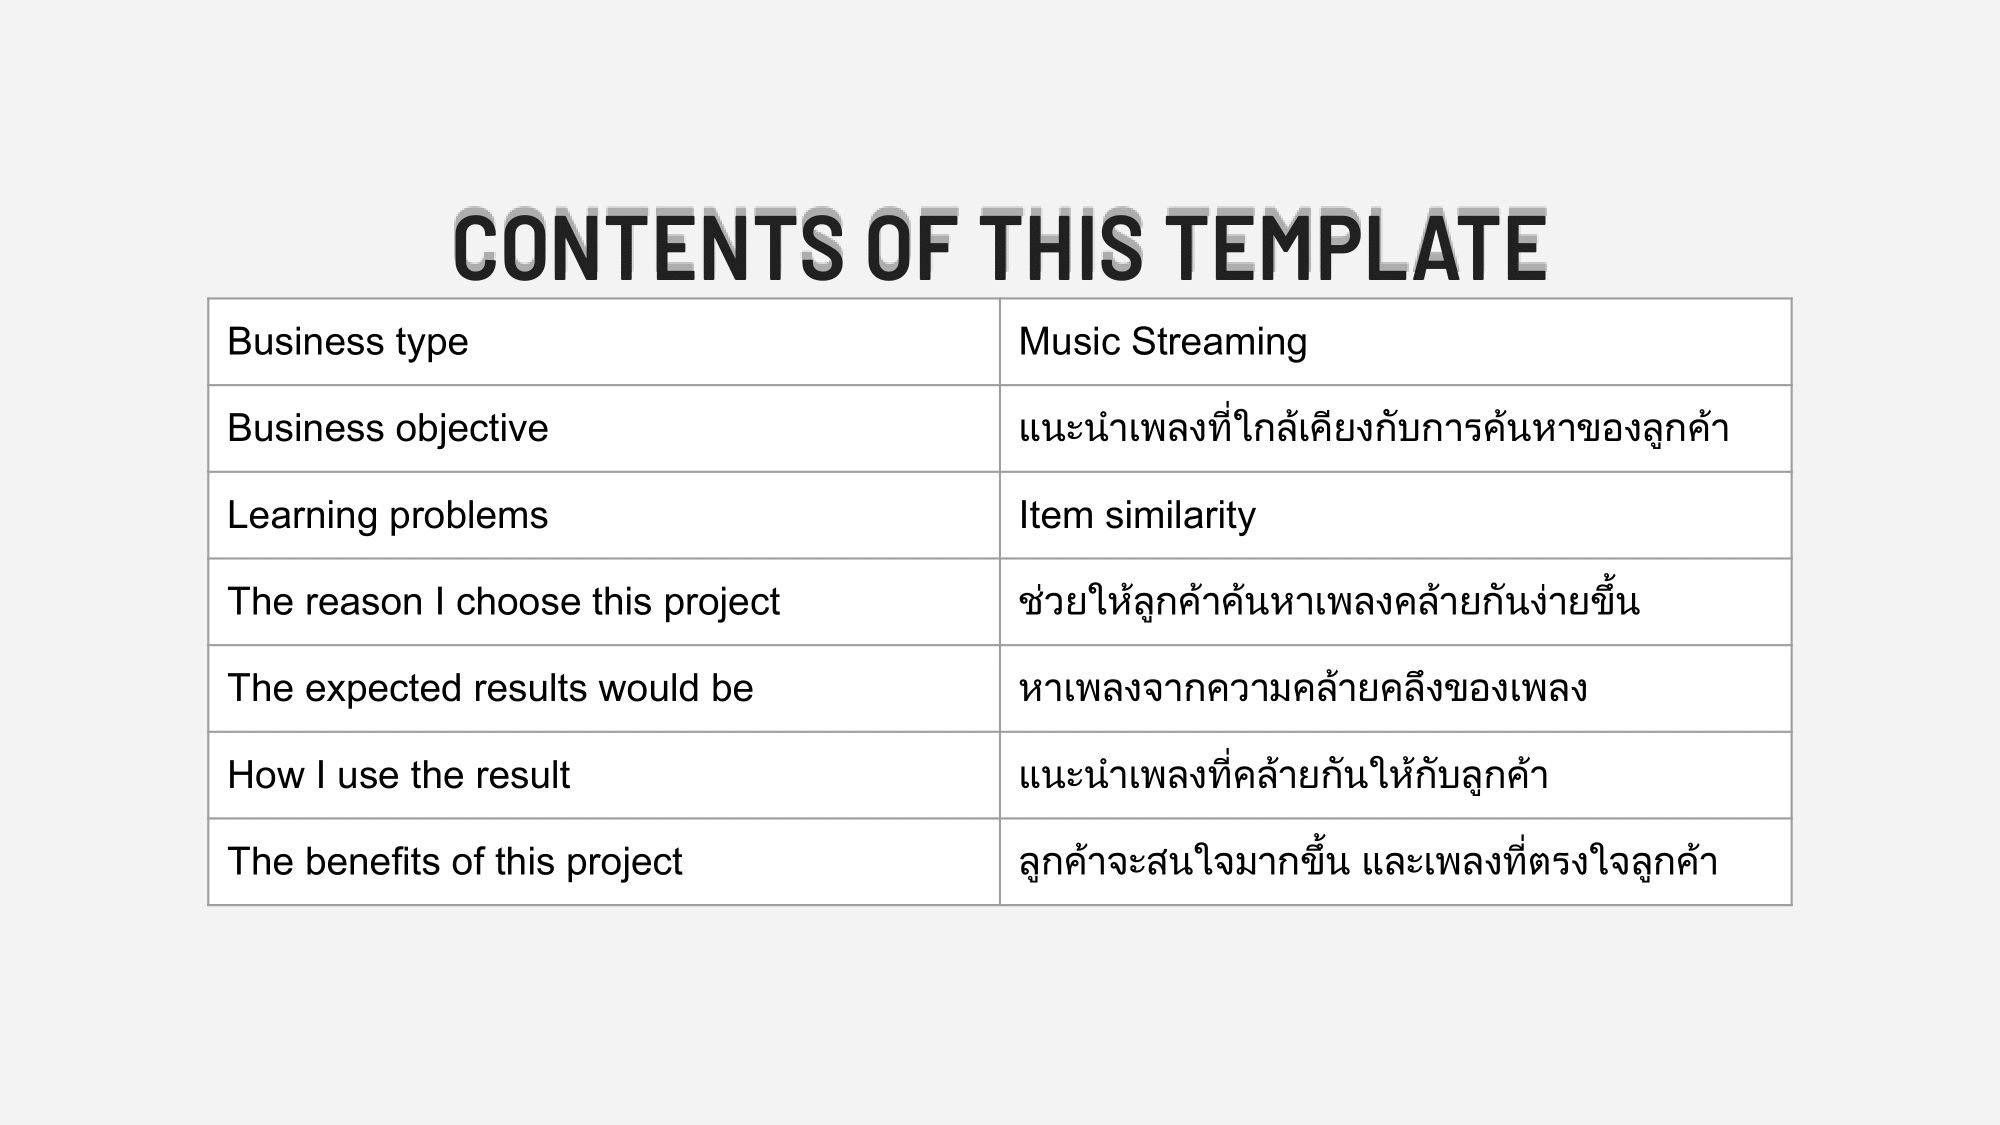

## **Flow**

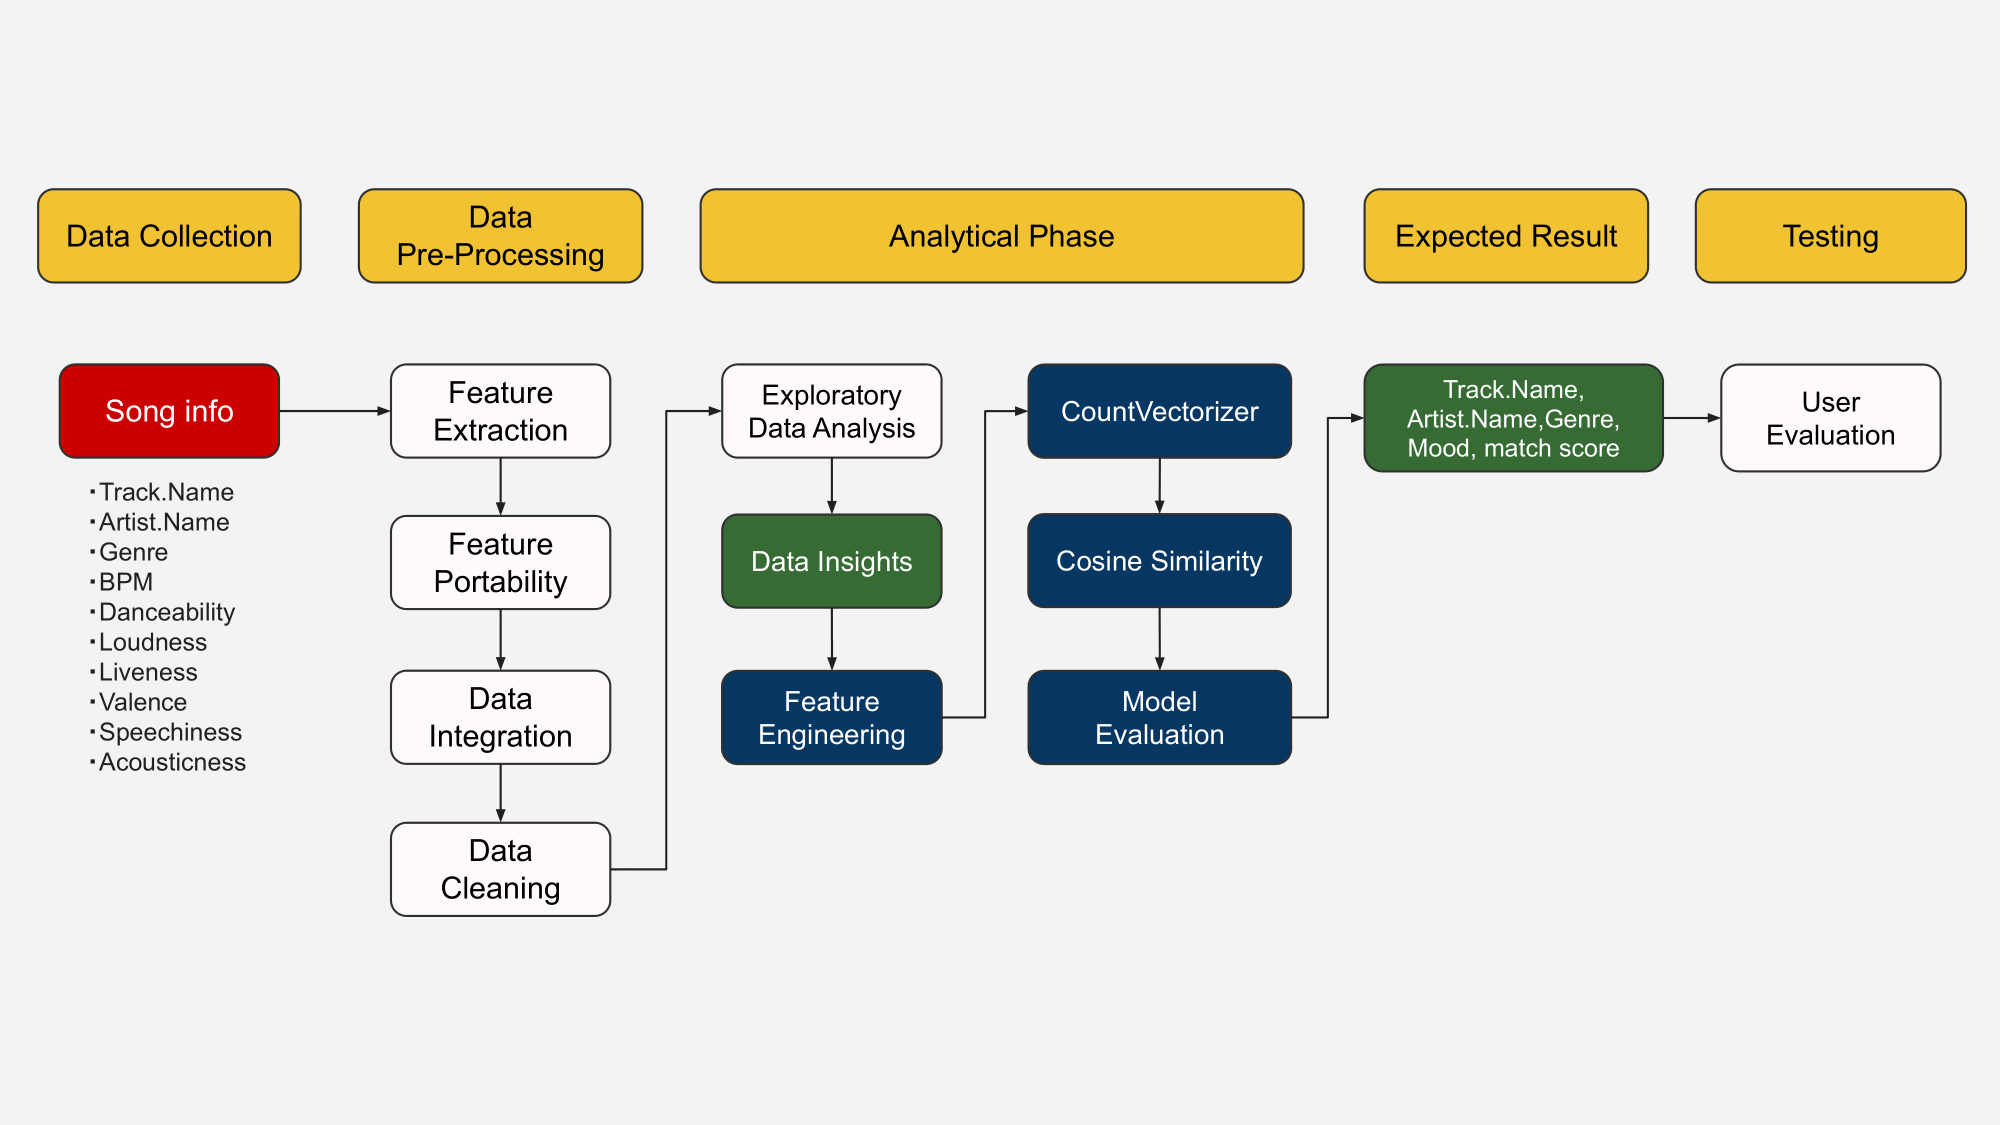

# Import

In [47]:
#import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

#ทำการปิด warnings
import warnings
warnings.filterwarnings("ignore")

#เก็บข้อมูลลงในตัวแปร s_data
s_data = pd.read_csv('https://raw.githubusercontent.com/supat55/cs434RachamonVer3/main/top50.csv', encoding='ISO-8859-1')
s_data.head(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


#Check Data

In [2]:
#check info
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [3]:
#check มีค่าซ้ำหรือป่าว
s_data.duplicated().sum()

0

In [4]:
#check ค่า null ที่อยู่ในdataframe
s_data.isna().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [5]:
#check จำนวน Artists และ Genres
number_of_unique_artists = len(s_data['Artist.Name'].value_counts().to_list())
number_of_unique_genres = len(s_data['Genre'].value_counts().to_list())
print("Number Of Unique Artists: ",number_of_unique_artists,' | ','Number Of Unique Genres: ',number_of_unique_genres)

Number Of Unique Artists:  38  |  Number Of Unique Genres:  21


# Data-Prepocessing

In [6]:
s_data[30:35] #ในส่วนของเพลงนี้มันเป็นเพลงที่ไม่มีอยู่จริง เราจึงตัดออกจากฐานข้อมูล

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
30,31,Takeaway,The Chainsmokers,edm,85,51,29,-8,10,36,210,12,4,84
31,32,7 rings,Ariana Grande,dance pop,140,32,78,-11,9,33,179,59,33,89
32,33,0.958333333333333,Maluma,reggaeton,96,71,78,-5,9,68,176,22,28,89
33,34,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,98,59,80,-7,13,18,200,2,15,89
34,35,Never Really Over,Katy Perry,dance pop,100,88,77,-5,32,39,224,19,6,89


In [7]:
s_data.drop(32, inplace=True)

In [8]:
s_data[30:35]

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
30,31,Takeaway,The Chainsmokers,edm,85,51,29,-8,10,36,210,12,4,84
31,32,7 rings,Ariana Grande,dance pop,140,32,78,-11,9,33,179,59,33,89
33,34,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,98,59,80,-7,13,18,200,2,15,89
34,35,Never Really Over,Katy Perry,dance pop,100,88,77,-5,32,39,224,19,6,89
35,36,Summer Days (feat. Macklemore & Patrick Stump ...,Martin Garrix,big room,114,72,66,-7,14,32,164,18,6,89


In [9]:
#สร้างตัวแปรใหม่ df มาเก็บข้อมูล s_data
df = s_data.copy()

In [10]:
#จัดหมวดหมู่ โดยแบ่งเป็น 3 ส่วน ในส่วนของ loudness นั้น quiet = เป็นค่าที่ -n เสียงจะเบา, normal = เป็นค่าที่อยู่ระหว่างกลาง, loud = เป็นค่าที่ใกล้ 0 เสียงจะดัง
df['Energy.Type'] = df['Energy'].apply(lambda x: 'ELow' if x < 50 else 'EMean' if x >= 50 and x <= 69 else 'EHigh' if x > 69 else None)
df['Danceability.Type'] = df['Danceability'].apply(lambda x: 'DLow' if x < 49 else 'DMean' if x >= 49 and x <= 69 else 'DHigh' if x > 69 else None)
df['LoudnessdB.Type'] = df['Loudness..dB..'].apply(lambda x: 'quiet' if x < -8 else 'normal' if x >= -8 and x <= -5 else 'loud' if x > -5 else None)
df['Liveness.Type'] = df['Liveness'].apply(lambda x: 'LNLow' if x < 22 else 'LNMean' if x >= 22 and x <= 40 else 'LNHigh' if x > 40 else None)
df['Valence.Type'] = df['Valence.'].apply(lambda x: 'VLow' if x < 38 else 'VMean' if x >= 38 and x <= 66 else 'VHigh' if x > 66 else None)
df['Length.Type'] = df['Length.'].apply(lambda x: 'LLow' if x < 179 else 'LMean' if x >= 179 and x <= 244 else 'LHigh' if x > 244 else None)
df['Acousticness.Type'] = df['Acousticness..'].apply(lambda x: 'ALow' if x < 25 else 'AMean' if x >= 25 and x <= 50 else 'AHigh' if x > 50 else None)
df['Speechiness.Type'] = df['Speechiness.'].apply(lambda x: 'quiet' if x < 17 else 'normal' if x >= 17 and x <= 31 else 'loud' if x > 31 else None)
df.head(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Energy.Type,Danceability.Type,LoudnessdB.Type,Liveness.Type,Valence.Type,Length.Type,Acousticness.Type,Speechiness.Type
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,EMean,DHigh,normal,LNLow,VHigh,LMean,ALow,quiet
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,EHigh,DHigh,loud,LNLow,VMean,LHigh,ALow,quiet
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,EHigh,DLow,loud,LNLow,VHigh,LMean,ALow,loud
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,EMean,DMean,normal,LNLow,VMean,LMean,ALow,normal
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,EMean,DMean,loud,LNLow,VLow,LLow,AMean,quiet


In [11]:
#จัดหมวดหมู่ของ genres ให้เป็นหมวดหมู่ที่ใหญ่และชัดเจนขึ้น
main_genres = ['rock','pop','blues','hip hop','jazz','reggae','techno','trap','regga','rap','r&b']
def check_genre(sir):
    for word in main_genres:
        if sir.find(word) != -1:
            if word == 'rap':
                return 'hip hop'
            else:
                return word
    return sir

df['Main.Genre'] = df['Genre'].apply(check_genre)
df.sample(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Energy.Type,Danceability.Type,LoudnessdB.Type,Liveness.Type,Valence.Type,Length.Type,Acousticness.Type,Speechiness.Type,Main.Genre
37,38,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87,EHigh,DHigh,normal,LNMean,VHigh,LLow,ALow,quiet,pop
35,36,Summer Days (feat. Macklemore & Patrick Stump ...,Martin Garrix,big room,114,72,66,-7,14,32,164,18,6,89,EHigh,DMean,normal,LNLow,VLow,LLow,ALow,quiet,big room
42,43,Shallow,Lady Gaga,dance pop,96,39,57,-6,23,32,216,37,3,87,ELow,DMean,normal,LNMean,VLow,LMean,AMean,quiet,pop
30,31,Takeaway,The Chainsmokers,edm,85,51,29,-8,10,36,210,12,4,84,EMean,DLow,normal,LNLow,VLow,LMean,ALow,quiet,edm
43,44,Talk,Khalid,pop,136,40,90,-9,6,35,198,5,13,84,ELow,DHigh,quiet,LNLow,VLow,LMean,ALow,quiet,pop


In [12]:
#จัดหมวดหมู่ Beats per minute เป็น 6 ส่วน
df['BPM.Type'] = df['Beats.Per.Minute'].apply(lambda x: 'Andante' if x >= 72 and x <= 90
                                                  else 'Moderatto' if x >= 91 and x <= 101
                                                  else 'Allegretto' if x >= 102 and x <= 124
                                                  else 'Allegro' if x >= 125 and x <= 135
                                                  else 'Vivace' if x >= 136 and x <= 173
                                                  else 'Presto' if x >= 174 and x <= 216
                                                  else None)
df.sample(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Energy.Type,Danceability.Type,LoudnessdB.Type,Liveness.Type,Valence.Type,Length.Type,Acousticness.Type,Speechiness.Type,Main.Genre,BPM.Type
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92,EMean,DHigh,loud,LNLow,VLow,LMean,ALow,quiet,hip hop,Moderatto
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,EMean,DHigh,normal,LNLow,VLow,LLow,ALow,normal,trap,Presto
30,31,Takeaway,The Chainsmokers,edm,85,51,29,-8,10,36,210,12,4,84,EMean,DLow,normal,LNLow,VLow,LMean,ALow,quiet,edm,Andante
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,EMean,DHigh,normal,LNLow,VHigh,LMean,ALow,quiet,pop,Allegretto
19,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91,EMean,DHigh,loud,LNLow,VMean,LLow,ALow,quiet,escape room,Vivace


# EDA

## **การนับจำนวนของเพลง**

* แนวเพลงในประเภทย่อย

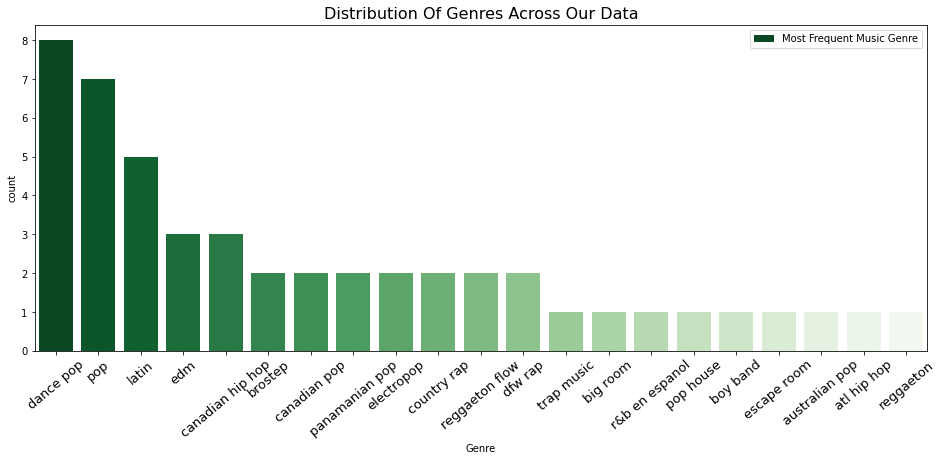

In [13]:
plt.figure(figsize=(16,6))
ax = sns.countplot(df['Genre'],palette='Greens_r',order=df['Genre'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,size=13)
ax.set_title('Distribution Of Genres Across Our Data',fontsize=16)

plt.legend({'Most Frequent Music Genre':0},prop={'size':'10'})
plt.show();

* แนวเพลงประเภทหลัก

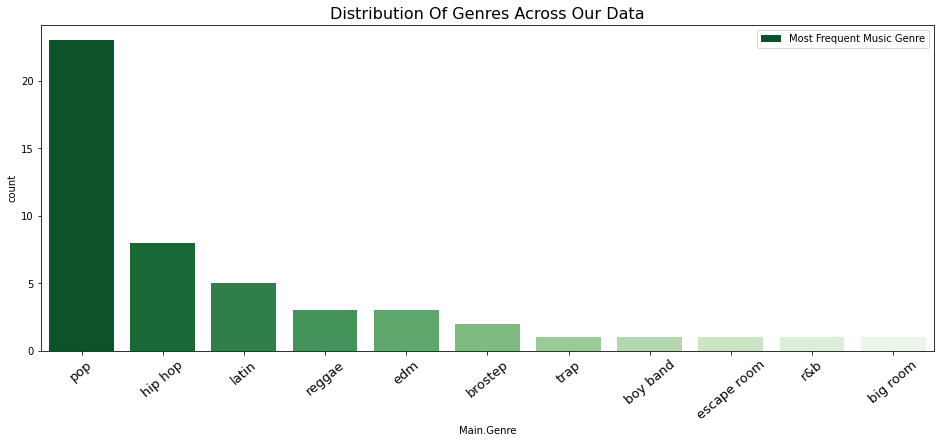

In [14]:
plt.figure(figsize=(16,6))
ax = sns.countplot(df['Main.Genre'],palette='Greens_r',order=df['Main.Genre'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,size=13)
ax.set_title('Distribution Of Genres Across Our Data',fontsize=16)
plt.legend({'Most Frequent Music Genre':0},prop={'size':'10'})
plt.show();

* จำนวนเพลงในความเร็วในแต่ละส่วนของ Beats.Per.Minute

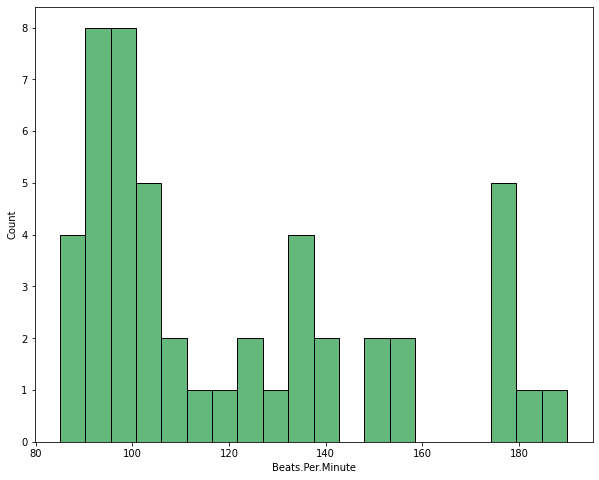

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(df, x='Beats.Per.Minute', color='#30a150', bins=20);

## **การเปรียบเทียบค่า**

**แนวเพลงมาเทียบกับค่าของ Valence ว่าแนวเพลงนั้นมีค่า Valence อยู่ที่เท่าไร**

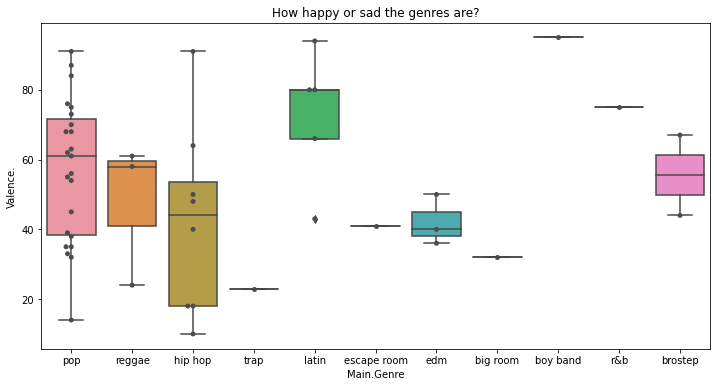

In [16]:
plt.figure(figsize=(12,6))

ax = sns.boxplot(x='Main.Genre', y='Valence.',data=df)
ax = sns.swarmplot(x='Main.Genre', y='Valence.',data=df, color='0.30').set_title('How happy or sad the genres are?')

**แนวเพลงมาเทียบกับค่าของ Energy ว่าแนวเพลงนั้นมีค่า Energy อยู่ที่เท่าไร**

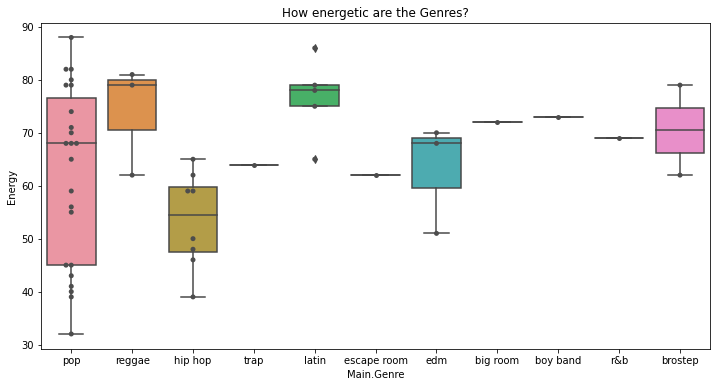

In [17]:
plt.figure(figsize=(12,6))

ax = sns.boxplot(x='Main.Genre', y='Energy',data=df)
ax = sns.swarmplot(x='Main.Genre', y='Energy',data=df, color='.30').set_title('How energetic are the Genres?')

## **แบ่ง mood ของแนวเพลง**

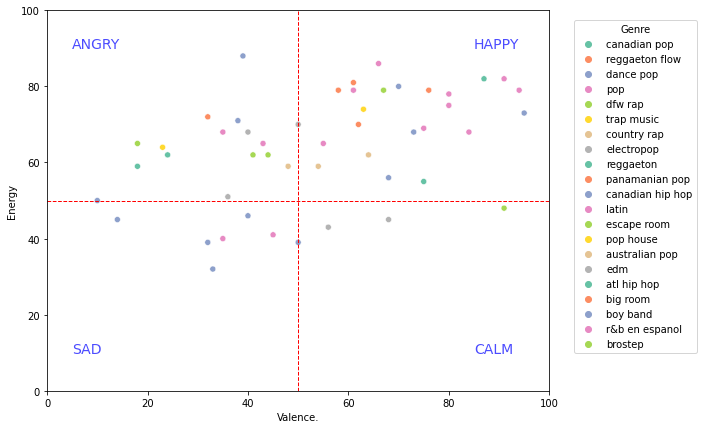

In [18]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x='Valence.', y='Energy', hue='Genre', legend=True, palette="Set2")
plt.legend(loc=[1.05,0.1], title="Genre")
plt.title("") #title
plt.xlabel("Valence.") #x label
plt.ylabel("Energy") #y label
plt.xlim([0, 100])
plt.ylim([0, 100])

plt.text(x=85, y=10, s="CALM", alpha=0.7,fontsize=14, color='b')
plt.text(x=5, y=10, s="SAD", alpha=0.7,fontsize=14, color='b')
plt.text(x=5, y=90, s="ANGRY", alpha=0.7,fontsize=14, color='b')
plt.text(x=85, y=90, s="HAPPY", alpha=0.7,fontsize=14, color='b')

plt.axhline(y=50, color='r', linestyle='--', linewidth=1)
plt.axvline(x=50, color='r',linestyle='--', linewidth=1)

plt.show()

In [19]:
#แบ่ง mood ของแนวเพลง และสร้างตัวแปรมาเก็บค่าของ Mood
mood = df.copy()
mood['Mood'] = None
sad = mood.query('`Valence.` <= 50 and `Energy` <= 50')
calm = mood.query('`Valence.` > 50 and `Energy` < 50')
angry = mood.query('`Valence.` < 50 and `Energy` > 50')
happy = mood.query('`Valence.` >= 50 and `Energy` >= 50')
sad['Mood'] = 'SAD'
calm['Mood'] = 'CALM'
angry['Mood'] = 'ANGRY'
happy['Mood'] ='HAPPY'
mood = pd.concat([sad, calm,angry,happy])
mood.sample(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Energy.Type,Danceability.Type,LoudnessdB.Type,Liveness.Type,Valence.Type,Length.Type,Acousticness.Type,Speechiness.Type,Main.Genre,BPM.Type,Mood
31,32,7 rings,Ariana Grande,dance pop,140,32,78,-11,9,33,179,59,33,89,ELow,DHigh,quiet,LNLow,VLow,LMean,AHigh,loud,pop,Vivace,SAD
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82,EHigh,DHigh,normal,LNLow,VMean,LMean,ALow,quiet,pop,Moderatto,HAPPY
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,EHigh,DHigh,loud,LNLow,VMean,LHigh,ALow,quiet,reggae,Allegretto,HAPPY
44,45,Con Altura,ROSALÍA,r&b en espanol,98,69,88,-4,5,75,162,39,12,88,EMean,DHigh,loud,LNLow,VHigh,LLow,AMean,quiet,r&b,Moderatto,HAPPY
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91,EHigh,DMean,normal,LNLow,VMean,LLow,ALow,quiet,pop,Allegretto,HAPPY


In [20]:
mood.shape

(49, 25)

#Feature engineering

* เราจะใช้ตัวตัดคำตัว CountVectorizer เพราะเราจะใช้ข้อมูลที่ใช้ในการค้นหาเป็นหลักๆ

In [21]:
#สร้างตัวแปรใหม่ DTT มาเก็บข้อมูล mood
DTT = mood[['Track.Name','Artist.Name','Genre','Energy.Type','Danceability.Type','LoudnessdB.Type','Liveness.Type','Valence.Type','Acousticness.Type','Speechiness.Type','Main.Genre','BPM.Type','Mood']].copy()
DTT.sample(5)

,Track.Name,Artist.Name,Genre,Energy.Type,Danceability.Type,LoudnessdB.Type,Liveness.Type,Valence.Type,Acousticness.Type,Speechiness.Type,Main.Genre,BPM.Type,Mood
18,Lalala,Y2K,canadian hip hop,ELow,DHigh,normal,LNLow,VMean,ALow,quiet,hip hop,Allegro,SAD
2,boyfriend (with Social House),Ariana Grande,dance pop,EHigh,DLow,loud,LNLow,VHigh,ALow,loud,pop,Presto,HAPPY
36,Otro Trago,Sech,panamanian pop,EHigh,DHigh,normal,LNLow,VMean,ALow,loud,pop,Presto,HAPPY
48,Call You Mine,The Chainsmokers,edm,EHigh,DMean,normal,LNHigh,VMean,ALow,quiet,edm,Allegretto,HAPPY
45,One Thing Right,Marshmello,brostep,EMean,DMean,loud,LNHigh,VMean,ALow,quiet,brostep,Andante,ANGRY


In [22]:
# เรียกใช้ตัว CountVectorizer และตัว TfidfVectorizer
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')

In [23]:
#check info
DTT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 12 to 49
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Track.Name         49 non-null     object
 1   Artist.Name        49 non-null     object
 2   Genre              49 non-null     object
 3   Energy.Type        49 non-null     object
 4   Danceability.Type  49 non-null     object
 5   LoudnessdB.Type    49 non-null     object
 6   Liveness.Type      49 non-null     object
 7   Valence.Type       49 non-null     object
 8   Acousticness.Type  49 non-null     object
 9   Speechiness.Type   49 non-null     object
 10  Main.Genre         49 non-null     object
 11  BPM.Type           49 non-null     object
 12  Mood               49 non-null     object
dtypes: object(13)
memory usage: 5.4+ KB


สิ่งที่เราจะทำคือ ค้นหาแนวเพลงที่ใกล้เคียงกับค้นหามากที่สุดมาก่อน
หลังจากนั้น จะนำข้อมูลส่วนนั้นมาแนะนำ จะมีข้อมูลอยู่ 3 อย่าง

* ข้อมูลที่ใกล้เคียงมากที่สุด
* ต้องการจะแนะนำชื่อและอารมณ์ที่ใกล้เคียงกับเพลงหลัก
* ข้อมูลเหมือนกันโดยใช้แนวเพลงกับอารมณ์เป็นหลัก


In [24]:
# สร้าง describe ที่เป็นข้อมูลของ Song

describe = DTT['Genre'] + "," + DTT['Energy.Type'] + "," + DTT['Danceability.Type'] + "," + DTT['LoudnessdB.Type'] + "," + DTT['Liveness.Type'] + "," + DTT['Valence.Type']
describe += "," + DTT['Acousticness.Type'] + "," + DTT['Speechiness.Type'] + "," + DTT['BPM.Type'] + "," + DTT['Mood']
describe.sample(5)

18    canadian hip hop,ELow,DHigh,normal,LNLow,VMean...
46    latin,EHigh,DMean,loud,LNLow,VHigh,ALow,quiet,...
45    brostep,EMean,DMean,loud,LNHigh,VMean,ALow,qui...
1     reggaeton flow,EHigh,DHigh,loud,LNLow,VMean,AL...
44    r&b en espanol,EMean,DHigh,loud,LNLow,VHigh,AM...
dtype: object

- เราจะทำข้อมูล 3 รูปแบบ
    - 1. Song เราจะจับคู่ด้วย CountVectorizer, Cosine Similarity
    - 2. Type เราจะจับคู่ด้วย CountVectorizer, Cosine Similarity
    - 3. Mood เราจะจับคู่ด้วย CountVectorizer, Cosine Similarity

## สร้างตัว matrix สำหรับ Song ที่ใช้สำหรับข้อมูลที่คล้ายๆกัน

In [25]:
time_start = time.time()
cosine_similarity
Song_count_matrix = count_vectorizer.fit_transform(describe)
Song_cosine_sim = cosine_similarity(
    Song_count_matrix, Song_count_matrix)
Song_count_matrix.shape
time_end = time.time()
print(f"Song Similarity : {round(time_end - time_start, 5)} second")

Song Similarity : 0.01355 second


## สร้างตัว matrix สำหรับ แนวเพลงที่คล้ายๆกัน

In [26]:
time_start = time.time()
type_count_matrix = count_vectorizer.fit_transform(
    (DTT['Energy.Type'] + ';' + DTT['Danceability.Type'] + ';' + DTT['LoudnessdB.Type'] + ';' + DTT['Liveness.Type'] + ';' + DTT['Valence.Type'] + ';' + DTT['Acousticness.Type'] + ';' + DTT['Speechiness.Type']))
type_cosine_sim = cosine_similarity(type_count_matrix, type_count_matrix)
type_count_matrix.shape
time_end = time.time()
print(f"Type Similarity : {round(time_end - time_start, 5)} second")

Type Similarity : 0.01113 second


## สร้างตัว matrix สำหรับ เพลงที่คล้ายๆกัน โดยใช้แนวเพลงกับอารมณ์เป็นหลัก

In [27]:
time_start = time.time()
mood_count_matrix = count_vectorizer.fit_transform((DTT['Mood'] +';' + DTT['Genre']))
mood_cosine_sim = cosine_similarity(mood_count_matrix, mood_count_matrix)
mood_count_matrix.shape
time_end = time.time()
print(f"Mood Similarity : {round(time_end - time_start, 5)} second")

Mood Similarity : 0.00318 second


## สร้างตัว ตัวคลาสที่แนะนำข้อมูล

In [28]:
class Recommendations:
    def __init__(self, name: str, amount: int = 10):
        self.name = self.nearest_name(name)
        self.amount = amount

    def nearest_name(self, name: str):
        close = self.get_close_matches(name)
        get_sr = DTT['Track.Name'][DTT['Track.Name'].isin([name])]
        if len(get_sr) != 0:
            return get_sr.iloc[0]
        elif close:
            return close[0]
        return None

    def get_close_matches(self, name: str):
        global DTT
        get_sr2 = DTT['Track.Name'][DTT['Track.Name'].apply(
            lambda x: x.lower()).str.contains(name.lower())]
        if len(get_sr2) != 0:
            return get_sr2.tolist()
        return []

    def get_indices(self):
        metadata = DTT.reset_index()
        indices = pd.Series(metadata.index, index=metadata['Track.Name'])
        if not self.name:
            return None
        return indices[self.name]

    def get_recommendations(self, cosine_sim=Song_cosine_sim):
        indice = self.get_indices()
        if not indice:
            return 'No name was near'
        sim_scores = list(enumerate(cosine_sim[indice]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:self.amount + 1]
        _indices = [i[0] for i in sim_scores]

        recs = DTT[['Track.Name','Artist.Name','Genre','Energy.Type','Danceability.Type','LoudnessdB.Type','Liveness.Type','Valence.Type','Acousticness.Type','Speechiness.Type','Mood']].iloc[_indices]
        recs['match_score'] = [i[1] for i in sim_scores]
        recs['match_score'] = recs['match_score'].apply(lambda x: round(x, 4))
        recs = recs.loc[recs['Track.Name'] != self.name]
        return recs.loc[recs.match_score > 0, ['Track.Name','Artist.Name','Genre','Energy.Type','Danceability.Type','LoudnessdB.Type','Liveness.Type','Valence.Type','Acousticness.Type','Speechiness.Type','Mood', 'match_score']]

    def get_song_detail(self):
        return DTT.loc[DTT['Track.Name'] == self.name, ['Track.Name','Artist.Name','Genre','Energy.Type','Danceability.Type','LoudnessdB.Type','Liveness.Type','Valence.Type','Acousticness.Type','Speechiness.Type','Mood']]

    def get_recommendations_app(self, cosine_sim=Song_cosine_sim):
        indice = self.get_indices()
        if not indice:
            return 'No name was near'
        sim_scores = list(enumerate(cosine_sim[indice]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:self.amount + 1]
        _indices = [i[0] for i in sim_scores]

        recs = DTT[['Track.Name','Artist.Name','Genre','Mood']].iloc[_indices]
        recs['match_score'] = [i[1] for i in sim_scores]
        recs['match_score'] = recs['match_score'].apply(lambda x: round(x, 4))
        recs = recs.loc[recs['Track.Name'] != self.name]
        return recs.loc[recs.match_score > 0, ['Track.Name','Artist.Name','Genre','Mood', 'match_score']]

    def get_song_detail_app(self):
        return DTT.loc[DTT['Track.Name'] == self.name, ['Track.Name','Artist.Name','Genre','Mood']]

## **การแสดงผล**

In [29]:
recommend = Recommendations('Old Town Road')
recommend.get_song_detail()

,Track.Name,Artist.Name,Genre,Energy.Type,Danceability.Type,LoudnessdB.Type,Liveness.Type,Valence.Type,Acousticness.Type,Speechiness.Type,Mood
8,Old Town Road - Remix,Lil Nas X,country rap,EMean,DHigh,normal,LNLow,VMean,ALow,quiet,HAPPY


*จะได้ข้อมูลใกล้เคียงกับเพลงที่เราค้นหามากที่สุด*


**แสดงข้อมูลที่ แนวเพลง คล้ายกับเพลงที่ค้นหามากที่สุด**
- column ที่ใช้ 
  - Genre
  - Energy.Type
  - Danceability.Type
  - LoudnessdB.Type
  - Liveness.Type
  - Valence.Type
  - Acousticness.Type
  - Speechiness.Type
  - BPM.Type
  - Mood
- จะนำข้อมูลที่ได้ ไปแนะนำผู้ใช้งาน

In [30]:
time_start = time.time()
recommendation = recommend.get_recommendations()
time_end = time.time()

print(f"Song Recommendation : {round(time_end - time_start, 4)} s")

Song Recommendation : 0.0131 s


In [31]:
recommendation

,Track.Name,Artist.Name,Genre,Energy.Type,Danceability.Type,LoudnessdB.Type,Liveness.Type,Valence.Type,Acousticness.Type,Speechiness.Type,Mood,match_score
21,Panini,Lil Nas X,country rap,EMean,DHigh,normal,LNLow,VMean,AMean,quiet,ANGRY,0.8182
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,EMean,DHigh,normal,LNLow,VHigh,ALow,quiet,HAPPY,0.6674
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,EHigh,DHigh,normal,LNLow,VMean,ALow,quiet,HAPPY,0.6674
19,Truth Hurts,Lizzo,escape room,EMean,DHigh,loud,LNLow,VMean,ALow,quiet,ANGRY,0.6364
0,Señorita,Shawn Mendes,canadian pop,EMean,DHigh,normal,LNLow,VHigh,ALow,quiet,HAPPY,0.6364
26,Dance Monkey,Tones and I,australian pop,EMean,DHigh,normal,LNLow,VMean,AHigh,quiet,HAPPY,0.6364
38,Sucker,Jonas Brothers,boy band,EHigh,DHigh,normal,LNLow,VHigh,ALow,quiet,HAPPY,0.6364
41,You Need To Calm Down,Taylor Swift,dance pop,EMean,DHigh,normal,LNLow,VHigh,ALow,quiet,HAPPY,0.6364
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,EMean,DMean,normal,LNLow,VMean,ALow,normal,HAPPY,0.6093
16,LA CANCIÓN,J Balvin,latin,EMean,DHigh,normal,LNLow,VMean,ALow,loud,ANGRY,0.5721


*จะได้ข้อมูลใกล้เคียงกับเพลงที่เราค้นหามากที่สุด*


**แสดงข้อมูล แนวเพลง คล้ายกับเพลงที่ค้นหามากที่สุด**
- column ที่ใช้ 
  - Energy.Type
  - Danceability.Type
  - LoudnessdB.Type
  - Liveness.Type
  - Valence.Type
  - Acousticness.Type
  - Speechiness.Type
- จะนำข้อมูลที่ได้ ไปแนะนำผู้ใช้งาน

In [32]:
time_start = time.time()
recommendation = recommend.get_recommendations(type_cosine_sim)
time_end = time.time()
print(f"Type Recommendation : {round(time_end - time_start, 4)} s")

Type Recommendation : 0.0063 s


In [33]:
recommendation

,Track.Name,Artist.Name,Genre,Energy.Type,Danceability.Type,LoudnessdB.Type,Liveness.Type,Valence.Type,Acousticness.Type,Speechiness.Type,Mood,match_score
18,Lalala,Y2K,canadian hip hop,ELow,DHigh,normal,LNLow,VMean,ALow,quiet,SAD,0.8571
16,LA CANCIÓN,J Balvin,latin,EMean,DHigh,normal,LNLow,VMean,ALow,loud,ANGRY,0.8571
19,Truth Hurts,Lizzo,escape room,EMean,DHigh,loud,LNLow,VMean,ALow,quiet,ANGRY,0.8571
21,Panini,Lil Nas X,country rap,EMean,DHigh,normal,LNLow,VMean,AMean,quiet,ANGRY,0.8571
33,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,EMean,DHigh,normal,LNLow,VLow,ALow,quiet,ANGRY,0.8571
40,Higher Love,Kygo,edm,EMean,DMean,normal,LNLow,VMean,ALow,quiet,ANGRY,0.8571
0,Señorita,Shawn Mendes,canadian pop,EMean,DHigh,normal,LNLow,VHigh,ALow,quiet,HAPPY,0.8571
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,EMean,DHigh,normal,LNLow,VHigh,ALow,quiet,HAPPY,0.8571
26,Dance Monkey,Tones and I,australian pop,EMean,DHigh,normal,LNLow,VMean,AHigh,quiet,HAPPY,0.8571
41,You Need To Calm Down,Taylor Swift,dance pop,EMean,DHigh,normal,LNLow,VHigh,ALow,quiet,HAPPY,0.8571


จะได้ข้อมูลใกล้เคียงกับเพลงที่เราค้นหามากที่สุด


**แสดงข้อมูล อารมณ์เพลง คล้ายกับเพลงที่ค้นหามากที่สุด**
- column ที่ใช้ 
  - Genre
  - Mood
- จะนำข้อมูลที่ได้ ไปแนะนำผู้ใช้งาน

In [34]:
time_start = time.time()
recommendation = recommend.get_recommendations(mood_cosine_sim)
time_end = time.time()
print(f"Mood Recommendation : {round(time_end - time_start, 4)} s")

Mood Recommendation : 0.0074 s


In [35]:
recommendation

,Track.Name,Artist.Name,Genre,Energy.Type,Danceability.Type,LoudnessdB.Type,Liveness.Type,Valence.Type,Acousticness.Type,Speechiness.Type,Mood,match_score
21,Panini,Lil Nas X,country rap,EMean,DHigh,normal,LNLow,VMean,AMean,quiet,ANGRY,0.6667
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,EMean,DMean,normal,LNLow,VMean,ALow,normal,HAPPY,0.4082
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,EMean,DHigh,normal,LNLow,VHigh,ALow,quiet,HAPPY,0.4082
23,Soltera - Remix,Lunay,latin,EHigh,DHigh,loud,LNHigh,VHigh,AMean,quiet,HAPPY,0.4082
28,Con Calma,Daddy Yankee,latin,EHigh,DHigh,loud,LNLow,VMean,ALow,quiet,HAPPY,0.4082
29,QUE PRETENDES,J Balvin,latin,EHigh,DMean,loud,LNMean,VHigh,ALow,normal,HAPPY,0.4082
37,Antisocial (with Travis Scott),Ed Sheeran,pop,EHigh,DHigh,normal,LNMean,VHigh,ALow,quiet,HAPPY,0.4082
46,Te Robaré,Nicky Jam,latin,EHigh,DMean,loud,LNLow,VHigh,ALow,quiet,HAPPY,0.4082
47,Happier,Marshmello,brostep,EHigh,DMean,loud,LNLow,VHigh,ALow,quiet,HAPPY,0.4082
48,Call You Mine,The Chainsmokers,edm,EHigh,DMean,normal,LNHigh,VMean,ALow,quiet,HAPPY,0.4082


# Modeling

## Benchmark


เราจะนำทั้ง 2 Algorithm การตัดคำ มาทดสอบ จะมี
* TfidfVectorizer
* CountVectorizer


แต่เนื่องจากเราใช้ Linear kernel และ Cosine similarity ด้วย เราจึงทดสอบ TfidfVectorizer และ CountVectorizer โดยการใช้ Cosine similarity ไปก่อน

* ในการค้นหา **Song Recommendation**
  - column ที่ใช้ 
    - Genre
    - Energy.Type
    - Danceability.Type
    - LoudnessdB.Type
    - Liveness.Type
    - Valence.Type
    - Acousticness.Type
    - Speechiness.Type
    - BPM.Type
    - Mood

* ในการค้นหา **Type Recommendation**
  - column ที่ใช้ 
    - Energy.Type
    - Danceability.Type
    - LoudnessdB.Type
    - Liveness.Type
    - Valence.Type
    - Acousticness.Type
    - Speechiness.Type

* ในการค้นหา **Mood Recommendation**
  - column ที่ใช้ 
    - Genre
    - Mood


## TfidfVectorizer or CountVectorizer

การทดสอบ TfidfVectorizer และ CountVectorizer เราจะใช้เพลง `Old Town Road ` ในการทดสอบ

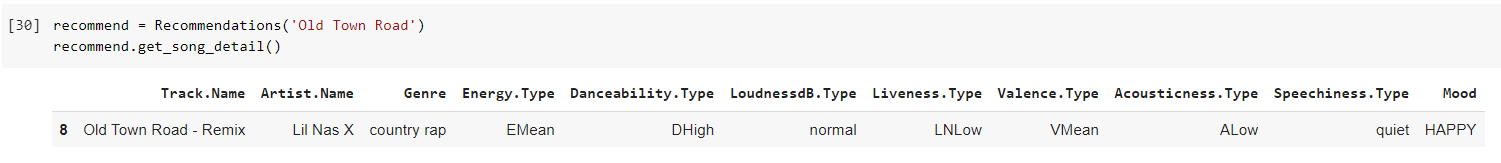

### **Song Recommendation**

เราจะทดสอบ **TfidfVectorizer** ก่อน

* **TfidfVectorizer**

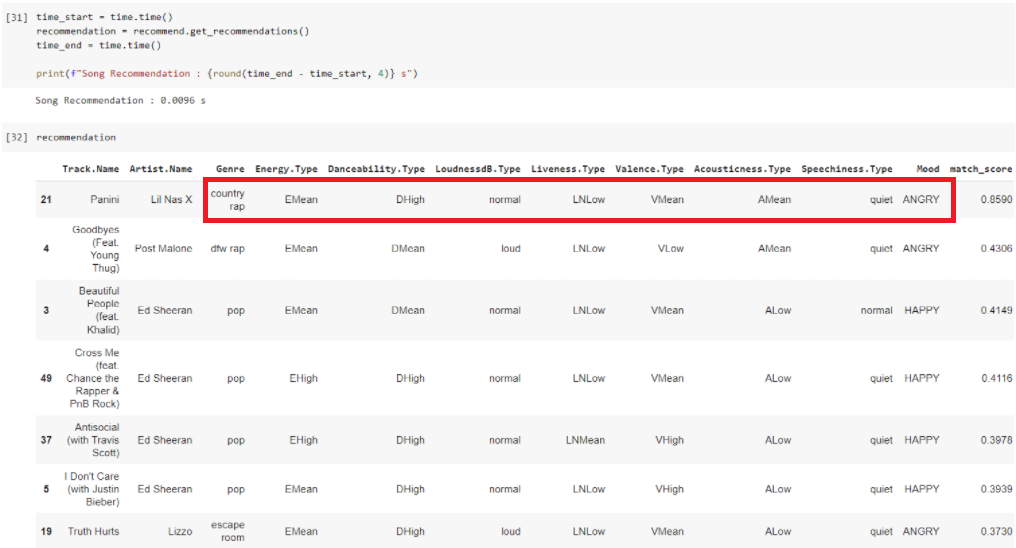

* **CountVectorizer**

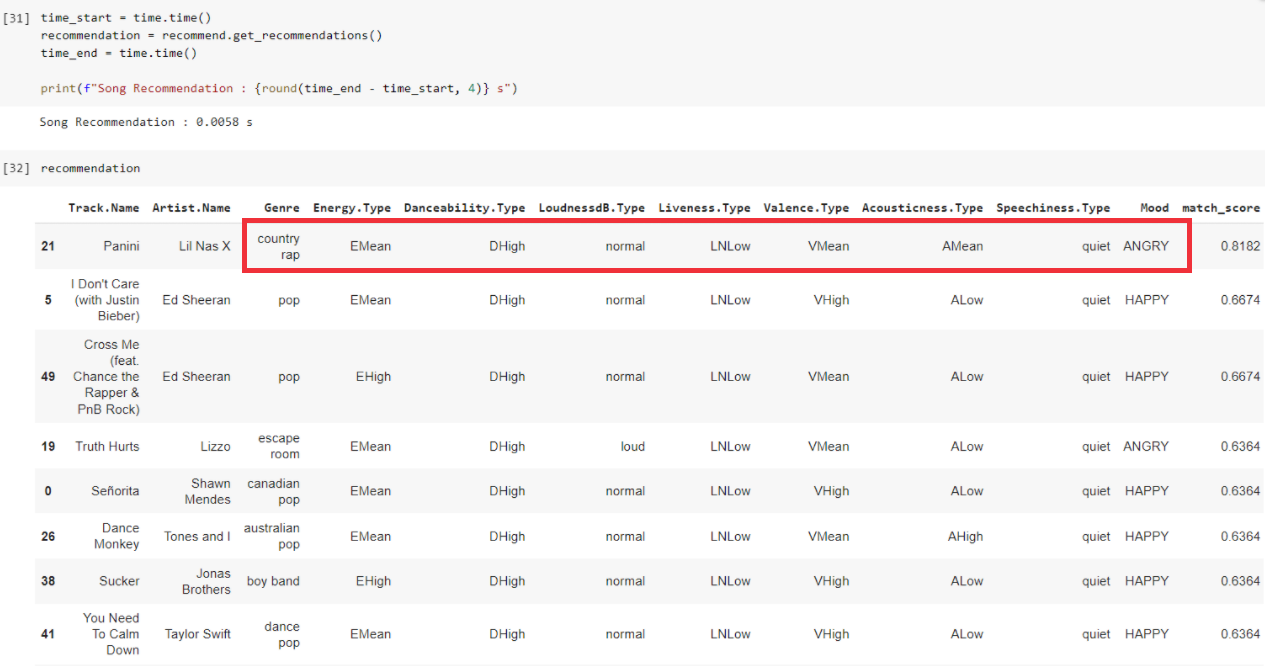

จากรูปตัวอย่างจะเห็นได้ว่า CountVectorizer กับ TfidfVectorizer นั้นลำดับจะต่างกัน อย่างเห็นได้ชัด

จากภาพรวมผมว่าตัว CountVectorizer แม่นยำกว่าและดีกว่าเพราะว่า
* เราอ้างอิงข้อมูลตามเพลง `Old Town Road` และเห็นได้ว่าข้อมูลตามเพลง กับผลลัพธ์นั้นค่อนข้างใกล้เคียงกัน
* เวลาในส่วนของ CountVectorizer ทำได้อยู่ที่ประมาณ `0.0058 s` ซึ่งดีกว่าส่วนของ TfidfVectorizer ที่ทำได้ประมาณ `0.0096 s`

ผมเลยเลือก `CountVectorizer` มาทำในส่วน **Song Recommendation**

### Type Recommendation

เราจะทดสอบ **TfidfVectorizer** ก่อน

* **TfidfVectorizer**

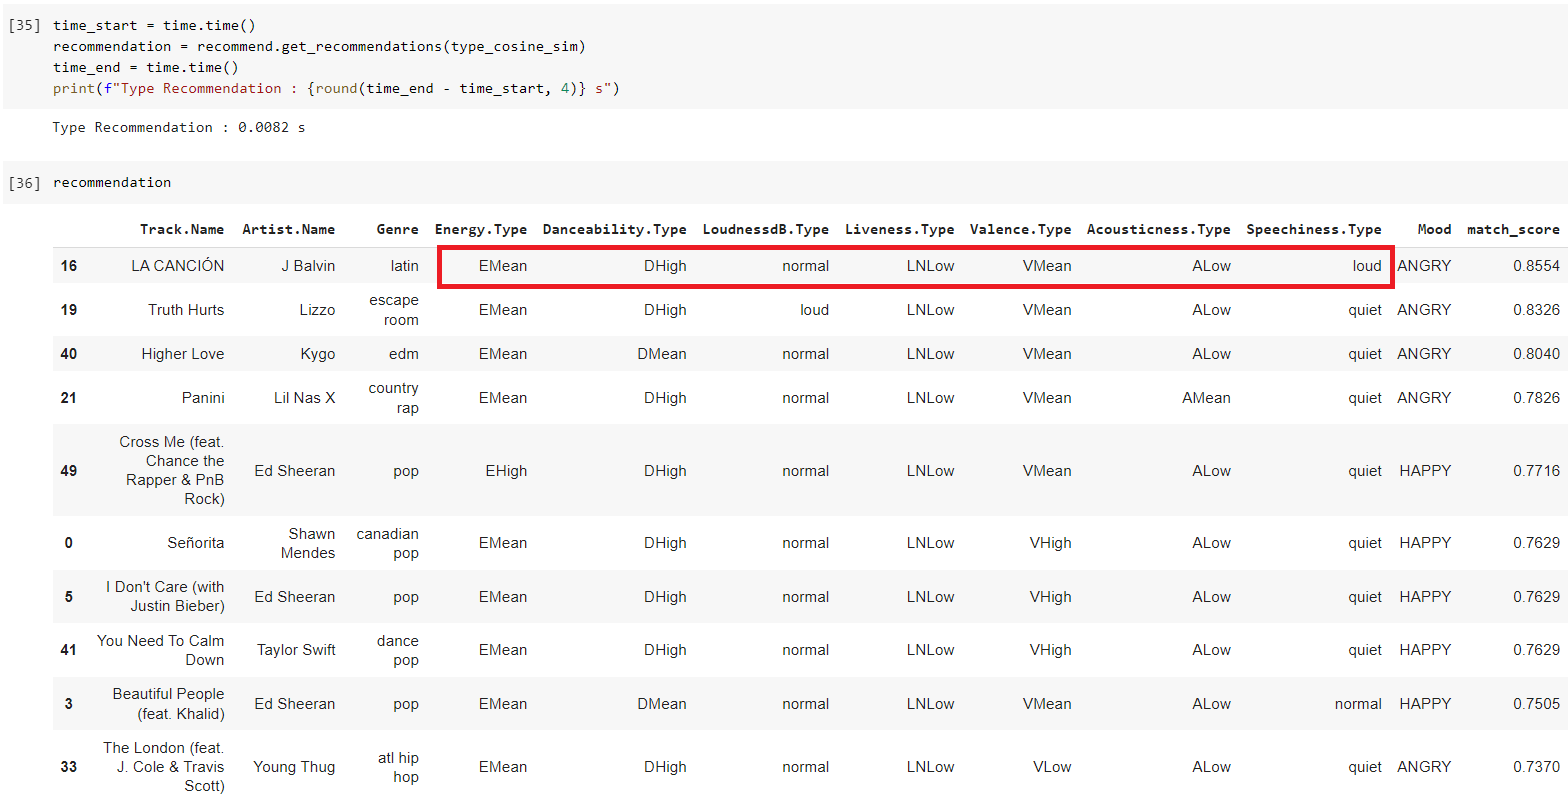

* **CountVectorizer**

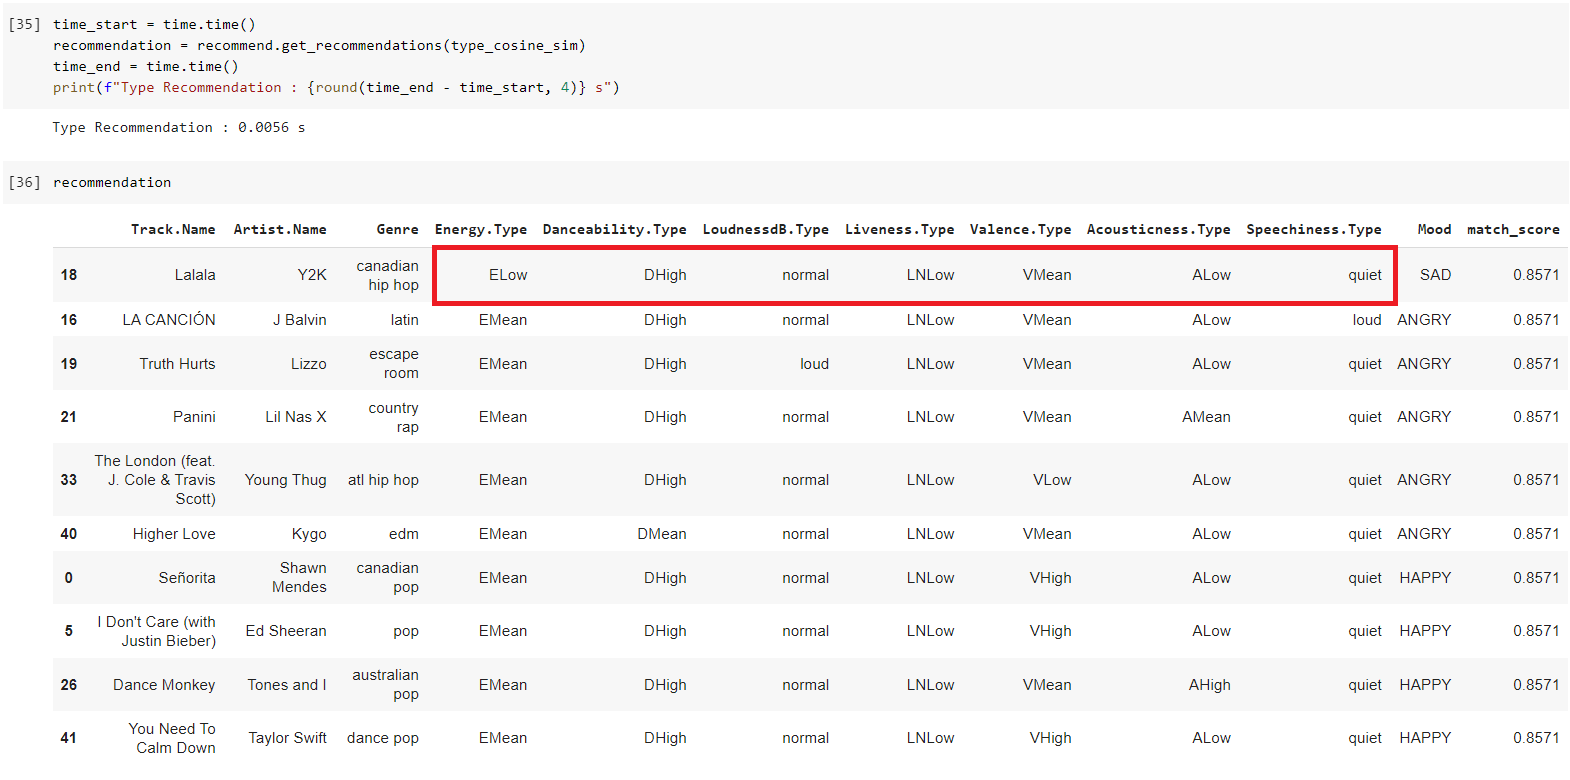

จากรูปตัวอย่างจะเห็นได้ว่า CountVectorizer กับ TfidfVectorizer นั้นลำดับจะต่างกัน อย่างเห็นได้ชัด

จากภาพรวมผมว่าตัว CountVectorizer แม่นยำกว่าและดีกว่าเพราะว่า
* เราอ้างอิงข้อมูลตามเพลง `Old Town Road` และเห็นได้ว่าข้อมูลตามเพลง กับผลลัพธ์นั้นค่อนข้างใกล้เคียงกัน ซึ่งต่างกันอยู่แค่ 1 จุด 
* เวลาในส่วนของ CountVectorizer ทำได้อยู่ที่ประมาณ `0.0056 s` ซึ่งดีกว่าส่วนของ TfidfVectorizer ที่ทำได้ประมาณ `0.0082 s`

ผมเลยเลือก `CountVectorizer` มาทำในส่วน **Type Recommendation**

### **Mood Recommendation**

เราจะทดสอบ **TfidfVectorizer** ก่อน

* **TfidfVectorizer**

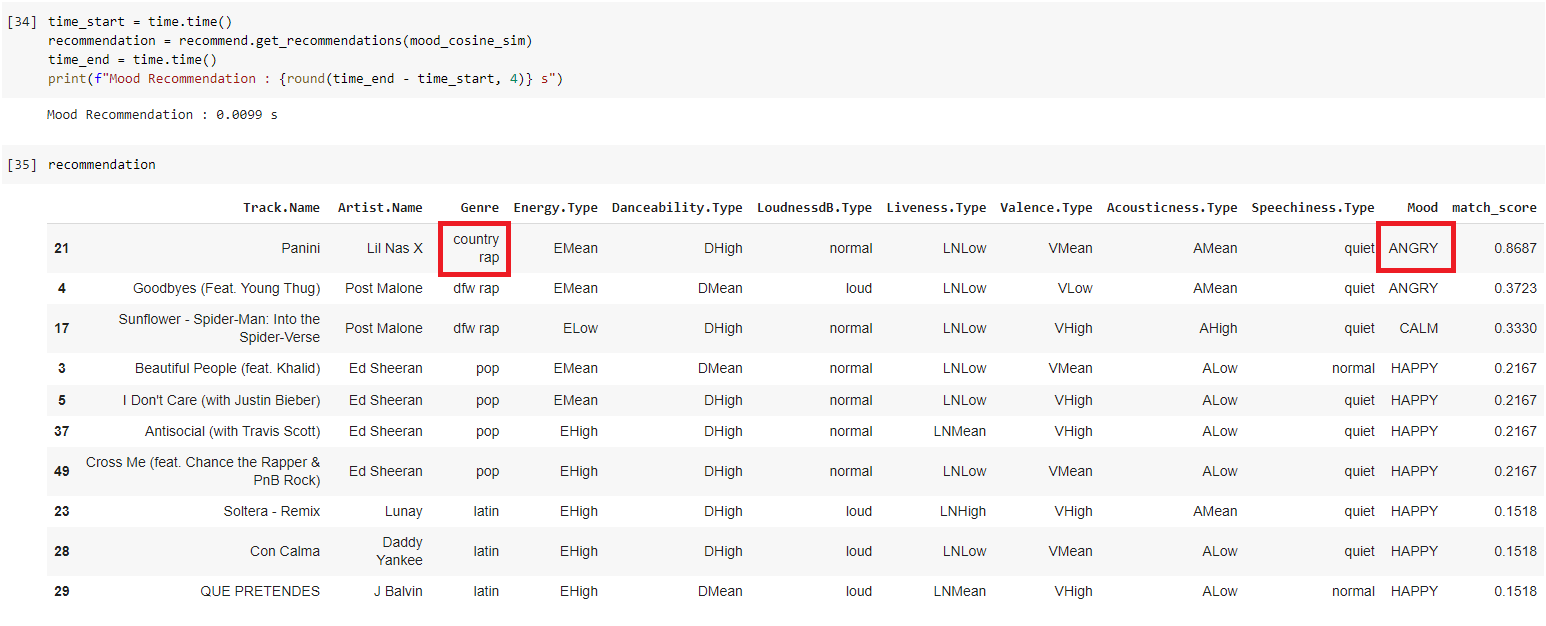

* **CountVectorizer**

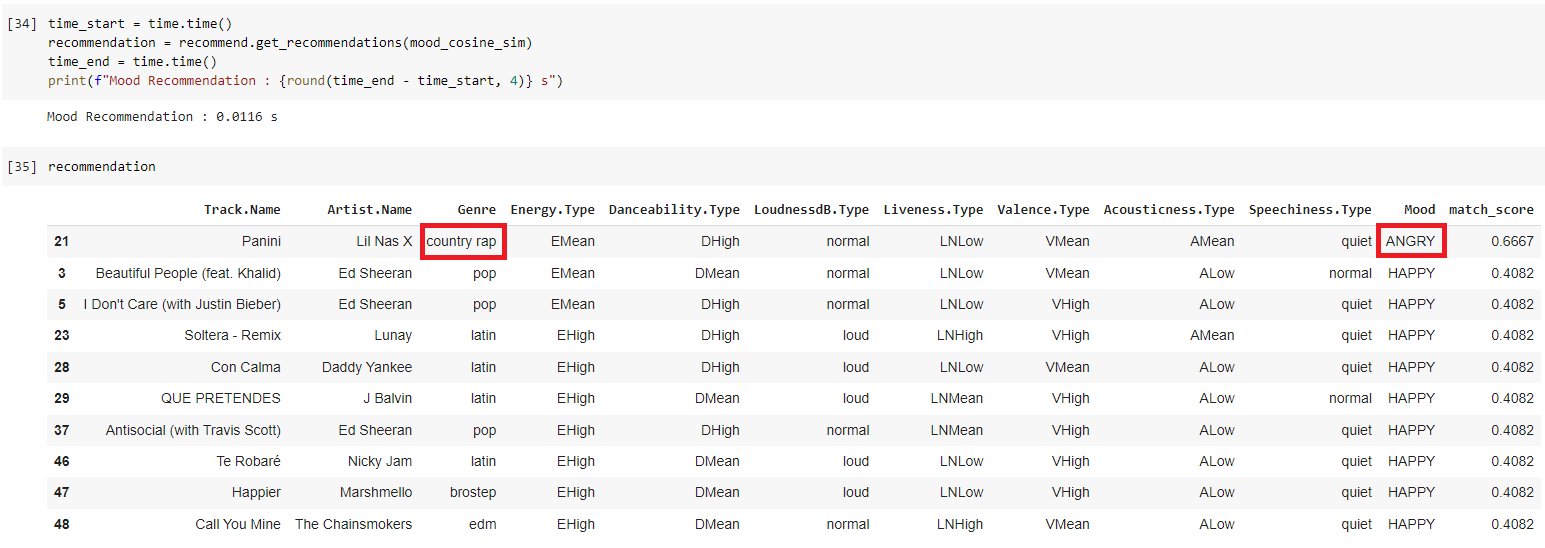

จากรูปตัวอย่างจะเห็นได้ว่า CountVectorizer กับ TfidfVectorizer นั้นลำดับจะต่างกัน อย่างเห็นได้ชัด

จากภาพรวมผมว่าตัว CountVectorizer แม่นยำกว่าและดีกว่าเพราะว่า
* เราอ้างอิงข้อมูลตามเพลง `Old Town Road` และเห็นได้ว่าข้อมูลตามเพลง กับผลลัพธ์นั้นค่อนข้างใกล้เคียงกัน เป็นส่วนใหญ่
* เวลาในส่วนของ CountVectorizer ทำได้อยู่ที่ประมาณ `0.0088 s` ซึ่งแพ้ทางด้านเวลาของ TfidfVectorizer ที่ทำได้ประมาณ `0.0061 s`

ผมเลยเลือก `CountVectorizer` มาทำในส่วน **Mood Recommendation**

## Linear kernel or Cosine similarity

เราจะมาดูในความแม่นยำในส่วนของ similarity

### **Song Recommendation**

เราจะทดสอบ **Linear Kernel** ก่อน

* **Linear Kernel**

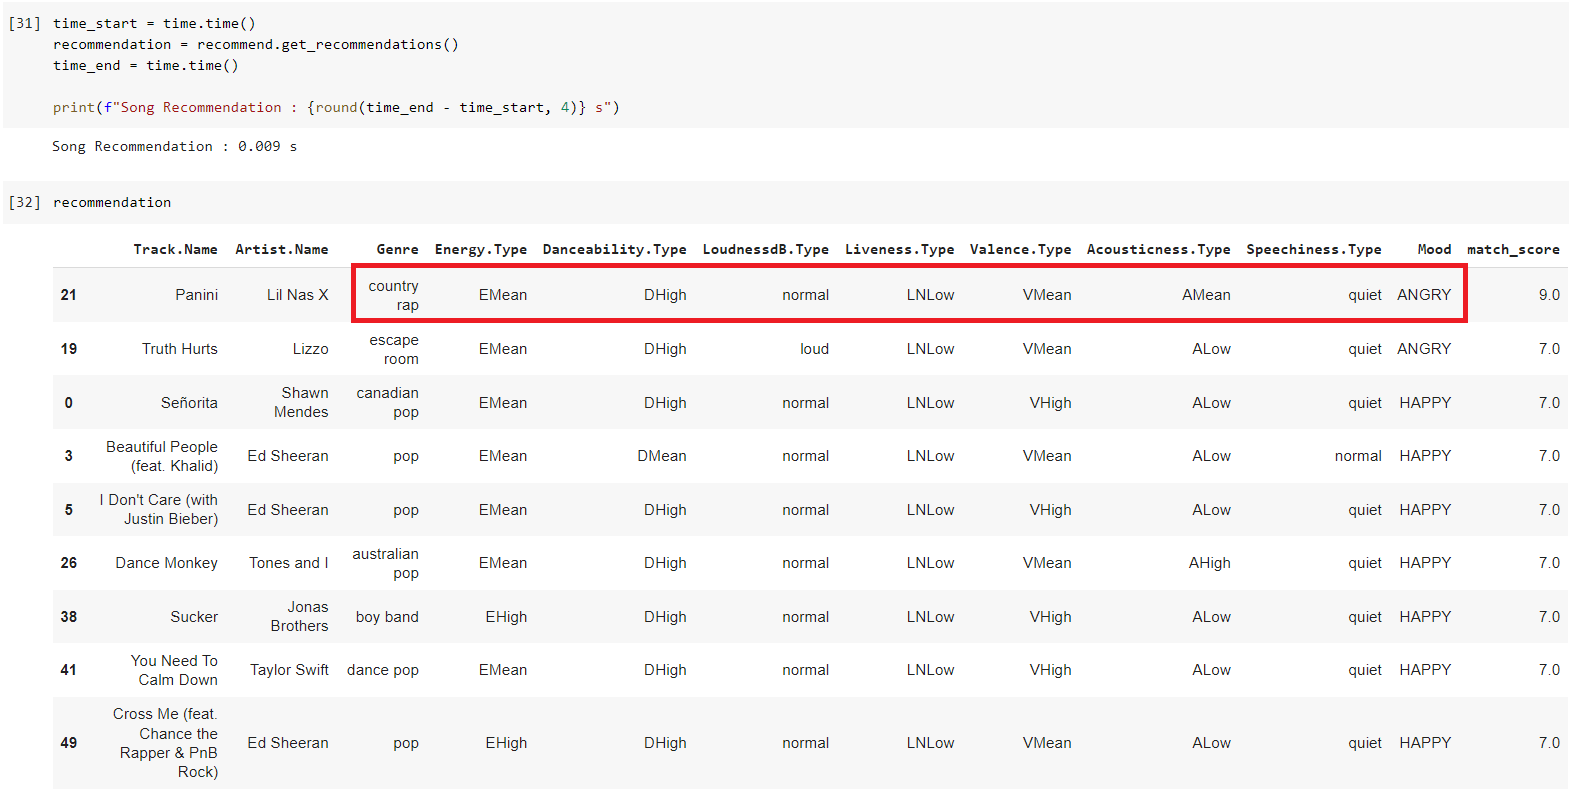

* **Cosine Similarity**

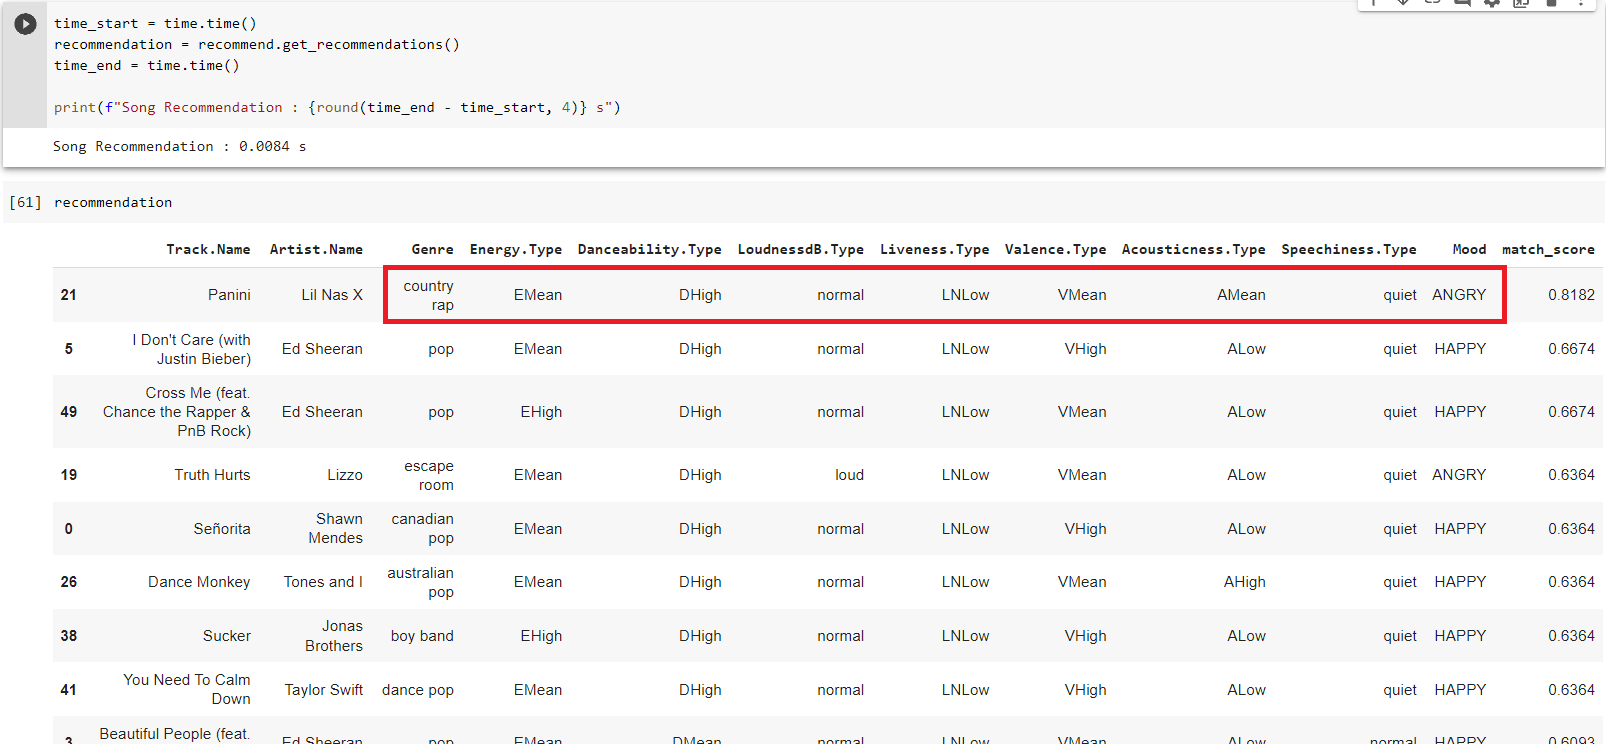

จากรูปตัวอย่างจะเห็นได้ว่า Linear Kernel กับ Cosine Similarity นั้นลำดับจะต่างกัน อย่างเห็นได้ชัด

ในส่วนของ **Song Recommendation** ผมจะเลือกใช้ตัว Cosine Similarity เพราว่า

การอ่านคำของ Cosine Similarity แม่นยำกว่าในส่วนเวลาของ Cosine Similarity ใช้เวลา `0.0084 s` และในส่วนของ Linear Kernel ใช้เวลา `0.009 s` 

ซึ่งเห็นได้ว่าเวลาของ `Cosine Similarity` ดีกว่า

### **Type Recommendation**

เราจะทดสอบ **Linear Kernel** ก่อน

* **Linear Kernel**

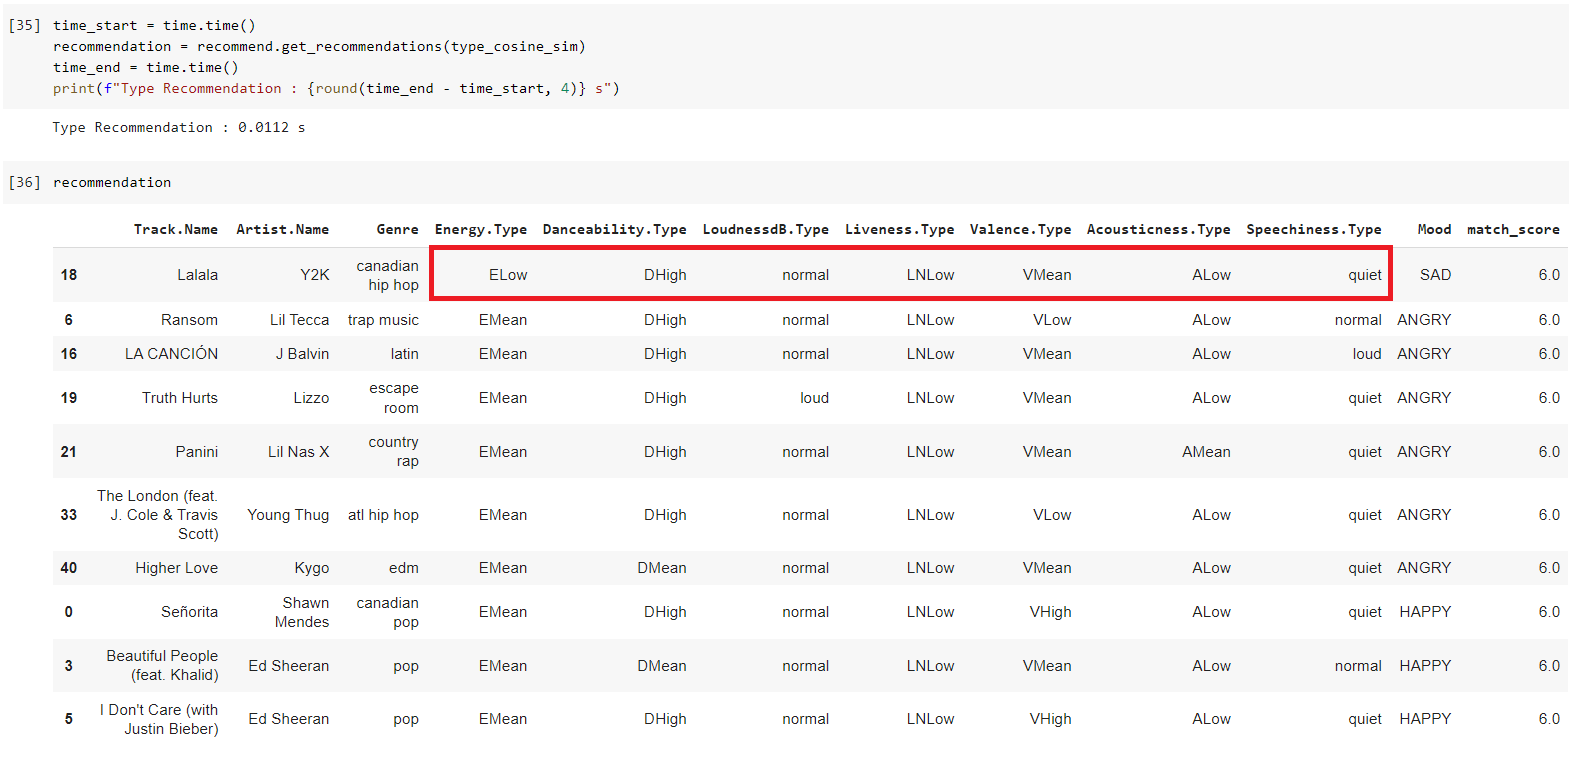

* **Cosine Similarity**

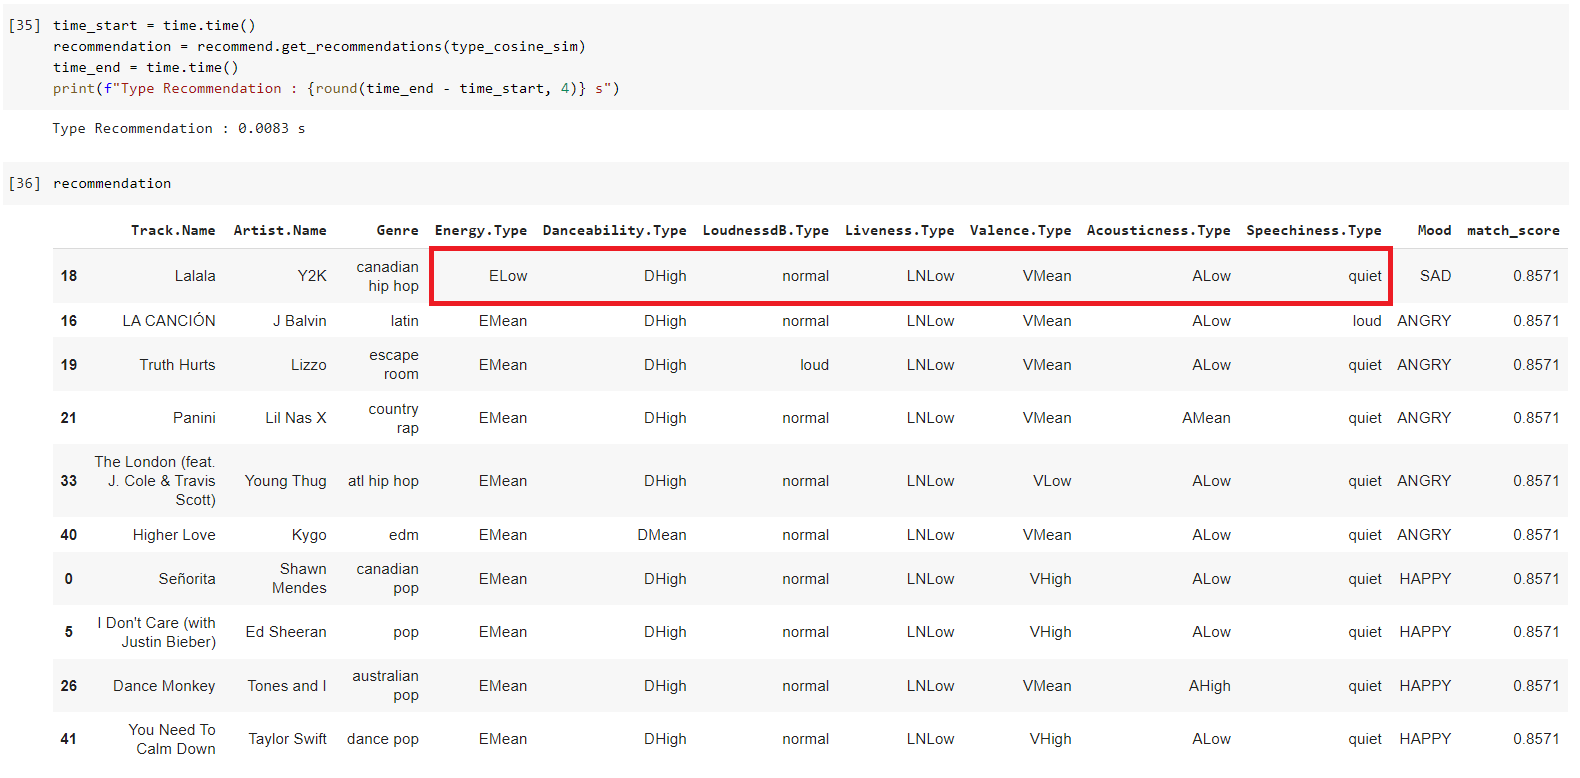

จากรูปตัวอย่างจะเห็นได้ว่า Linear Kernel กับ Cosine Similarity นั้นลำดับจะต่างกัน อย่างเห็นได้ชัด

ในส่วนของ **Type Recommendation** ผมจะเลือกใช้ตัว Cosine Similarity เพราว่า

การอ่านคำของ Cosine Similarity แม่นยำกว่าในส่วนเวลาของ Cosine Similarity ใช้เวลา `0.0083 s` และในส่วนของ Linear Kernel ใช้เวลา `0.0112 s` 

ซึ่งเห็นได้ว่าเวลาของ `Cosine Similarity` ดีกว่า

### **Mood Recommendation**

เราจะทดสอบ **Linear Kernel** ก่อน

* **Linear Kernel**

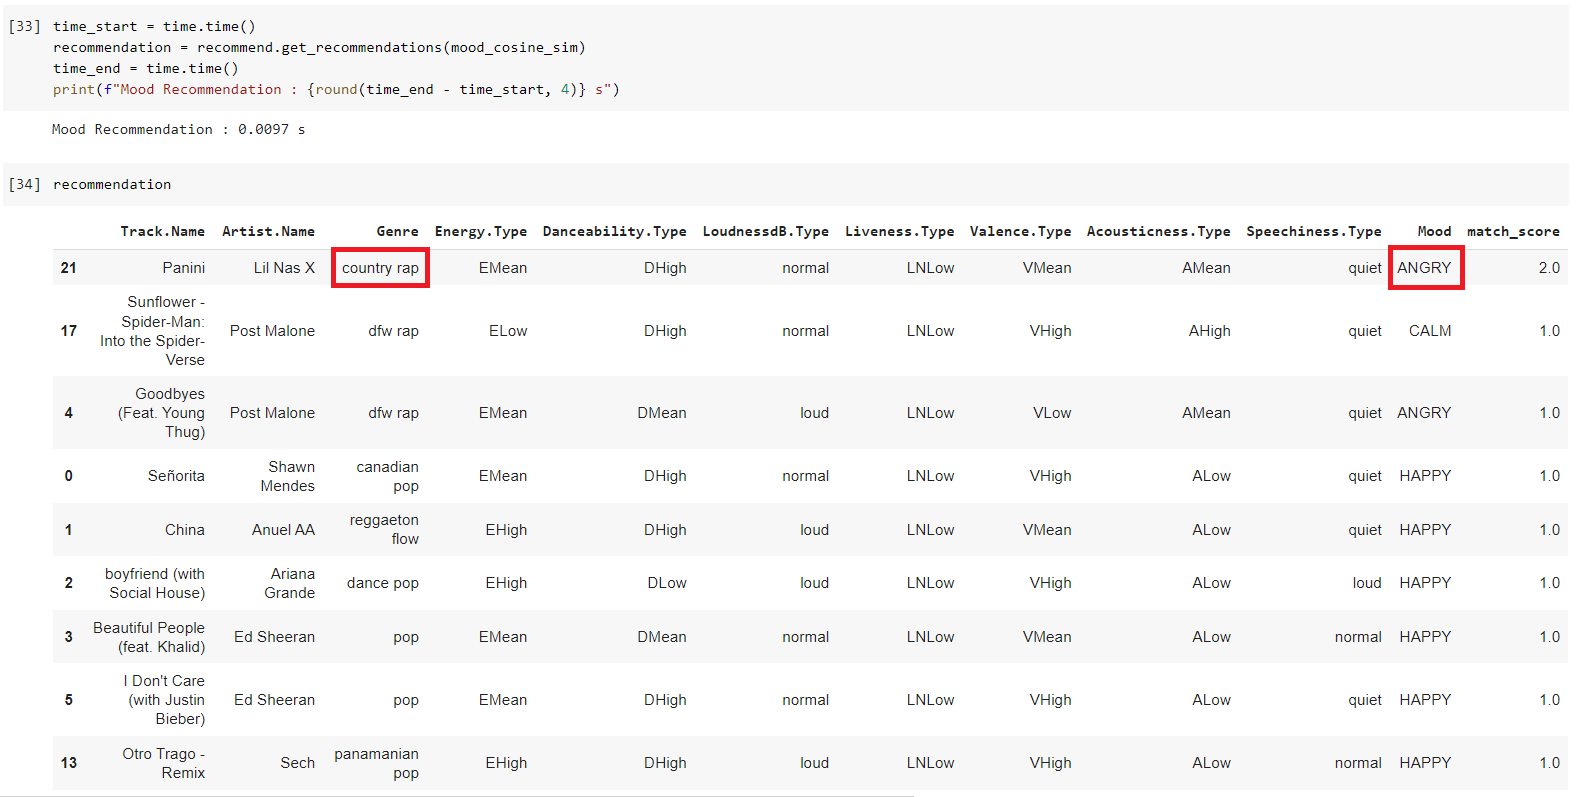

* **Cosine Similarity**

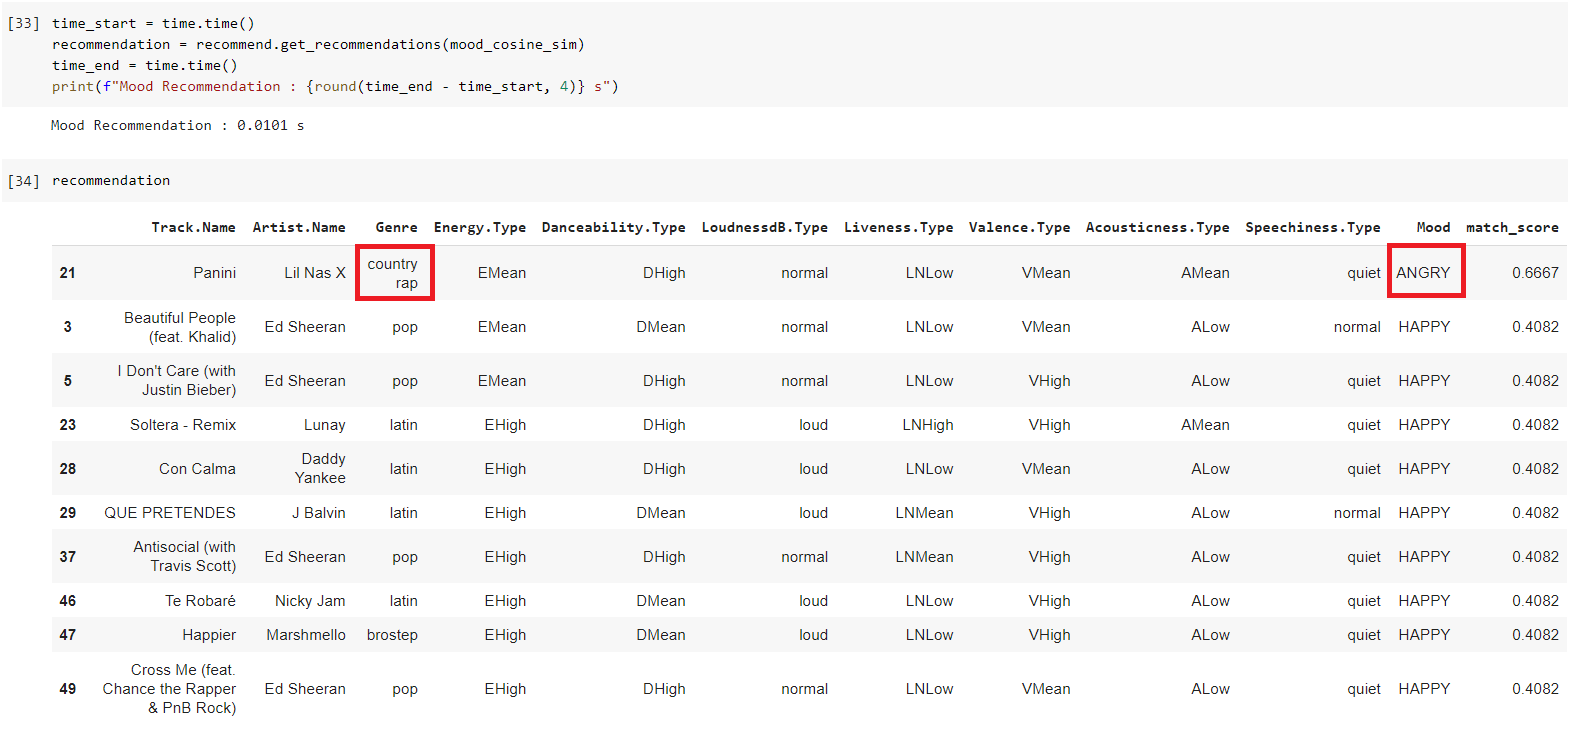

จากรูปตัวอย่างจะเห็นได้ว่า Linear Kernel กับ Cosine Similarity นั้นลำดับจะต่างกัน อย่างเห็นได้ชัด

ในส่วนของ **Mood Recommendation** ผมจะเลือกใช้ตัว Cosine Similarity เพราว่า

การอ่านคำของ Cosine Similarity แม่นยำกว่าในส่วนเวลาของ Cosine Similarity ใช้เวลา `0.0101 s` แต่ในส่วนของ Linear Kernel ใช้เวลาเพียง `0.0097 s` 

ซึ่งเห็นได้ว่าเวลาของ Linear Kernel ดีกว่า แต่เราเน้นความแม่นยำข้อมูลเป็นหลักผมจึงเลือก `Cosine Similarity`

#Pipeline 

จะเป็นส่วนที่นำส่วนที่เราทำมาข้างบนมารวมเพื่อนำไปใช้งานจริง

In [36]:
class Pipeline:
  def __init__(self, data: pd.DataFrame, vetorize: CountVectorizer or TfidfVectorizer, content):
    self.data = data.copy()
    self.vetorize = vetorize
    self.content = content

  def build_columns(self):
    self.data['Energy.Type'] = self.data['Energy'].apply(lambda x: 'ELow' if x < 50 else 'EMean' if x >= 50 and x <= 69 else 'EHigh' if x > 69 else None)
    self.data['Danceability.Type'] = self.data['Danceability'].apply(lambda x: 'DLow' if x < 49 else 'DMean' if x >= 49 and x <= 69 else 'DHigh' if x > 69 else None)
    self.data['LoudnessdB.Type'] = self.data['Loudness..dB..'].apply(lambda x: 'quiet' if x < -8 else 'normal' if x >= -8 and x <= -5 else 'loud' if x > -5 else None)
    self.data['Liveness.Type'] = self.data['Liveness'].apply(lambda x: 'LNLow' if x < 22 else 'LNMean' if x >= 22 and x <= 40 else 'LNHigh' if x > 40 else None)
    self.data['Valence.Type'] = self.data['Valence.'].apply(lambda x: 'VLow' if x < 38 else 'VMean' if x >= 38 and x <= 66 else 'VHigh' if x > 66 else None)
    self.data['Acousticness.Type'] = self.data['Acousticness..'].apply(lambda x: 'ALow' if x < 25 else 'AMean' if x >= 25 and x <= 50 else 'AHigh' if x > 50 else None)
    self.data['Speechiness.Type'] = self.data['Speechiness.'].apply(lambda x: 'quiet' if x < 17 else 'normal' if x >= 17 and x <= 31 else 'loud' if x > 31 else None)
    self.data['BPM.Type'] = self.data['Beats.Per.Minute'].apply(lambda x: 'Andante' if x >= 72 and x <= 90 else 'Moderatto' if x >= 91 and x <= 101 else 'Allegretto' if x >= 102 and x <= 124 else 'Allegro' if x >= 125 and x <= 135 else 'Vivace' if x >= 136 and x <= 173 else 'Presto' if x >= 174 and x <= 216 else 'No')

  def build_columns_mood(self):
    mood = self.data.copy()
    mood['Mood'] = None
    sad = mood.query('`Valence.` <= 50 and `Energy` <= 50')
    calm = mood.query('`Valence.` >= 50 and `Energy` <= 50')
    angry = mood.query('`Valence.` <= 50 and `Energy` >= 50')
    happy = mood.query('`Valence.` >= 50 and `Energy` >= 50')
    sad['Mood'] = 'SAD'
    calm['Mood'] = 'CALM'
    angry['Mood'] = 'ANGRY'
    happy['Mood'] ='HAPPY'
    self.data = pd.concat([sad,calm,angry,happy])
    self.data.drop_duplicates(subset='Track.Name', inplace=True)

  def build_columns_main_genre(self):
    self.data['Main.Genre'] = self.data['Genre'].apply(check_genre)

  main_genres = ['rock','pop','blues','hip hop','jazz','reggae','techno','trap','regga','rap','r&b']
  def check_genre(sir):
      for word in main_genres:
          if sir.find(word) != -1:
              if word == 'rap':
                  return 'hip hop'
              else:
                  return word
      return sir

  def reset_index(self):
        self.data.reset_index(drop=True, inplace=True)

  def feature_engineering(self):
    return self.vetorize.fit_transform(self.content)

  def remove_columns(self):
    self.data = self.data.reindex(columns=['Track.Name','Artist.Name','Genre','Energy.Type','Danceability.Type','LoudnessdB.Type','Liveness.Type','Valence.Type','Acousticness.Type','Speechiness.Type','Main.Genre','BPM.Type','Mood'])
    return self.data

  def builds(self):
    self.build_columns()
    self.build_columns_mood()
    self.build_columns_main_genre()
    self.remove_columns()
    self.reset_index()
    return self.feature_engineering()


**เรียกใช้ PipeLine, ปรับแต่ง algorithm**

In [37]:
# 1. Song recommendation เราจะใช้ตัว count vectorizer
describe = DTT['Genre'] + "," + DTT['Energy.Type'] + "," + DTT['Danceability.Type'] + "," + DTT['LoudnessdB.Type'] + "," + DTT['Liveness.Type'] + "," + DTT['Valence.Type']
describe += "," + DTT['Acousticness.Type'] + "," + DTT['Speechiness.Type'] + "," + DTT['BPM.Type'] + "," + DTT['Mood']
pipe = Pipeline(s_data, count_vectorizer, describe)
matrix = pipe.builds()
# Song recommendation เราจะใช้ตัว cousine similarity
song_similarity = cosine_similarity(matrix, matrix)

# 2. mood recommendation เราจะใช้ตัว count vectorizer
pipe = Pipeline(s_data, count_vectorizer, (DTT['Genre'].replace(to_replace='(;|&| +)', value=' ', regex=True) +';' + DTT['Mood']))
matrix = pipe.builds()
# Song recommendation เราจะใช้ตัว cousine similarity
mood_similarity = cosine_similarity(matrix, matrix)

# 3. type recommendation เราจะใช้ตัว count vectorizer
pipe = Pipeline(s_data, count_vectorizer, (DTT['Energy.Type'] + ';' + DTT['Danceability.Type'] + ';' + DTT['LoudnessdB.Type'] + ';' + DTT['Liveness.Type'] + ';' + DTT['Valence.Type'] + ';' + DTT['Acousticness.Type'] + ';' + DTT['Speechiness.Type']))
matrix = pipe.builds()
# type recommendation เราจะใช้ตัว cousine similarity
type_similarity = cosine_similarity(matrix, matrix)


**สร้างฟังชั่นเพื่อนนำไปใช้ในการ deployment**

In [38]:
def get_recommendations_app(name, type='Music', checkbox=False):
    mapping = {
        'Music': song_similarity,
        'Type': type_similarity,
        'Mood': mood_similarity
    }

    name = DTT.sample(1)['Track.Name'].item() if checkbox else name

    text = {
        'Music': "Genre, Energy.Type, Danceability.Type, LoudnessdB.Type, Liveness.Type, Valence.Type, Acousticness.Type, Speechiness.Type, BPM.Type, Mood",
        'Type': "Energy.Type, Danceability.Type, LoudnessdB.Type, Liveness.Type, Valence.Type, Acousticness.Type, Speechiness.Type, BPM.Type",
        'Mood': "Genre, Mood" 
    }
    recommend = Recommendations(name)
    detail = recommend.get_song_detail_app()
    return detail, recommend.get_recommendations_app(mapping[type]), text[type]

In [39]:
recommend = Recommendations('Old Town Road')
recommend.get_song_detail_app()

,Track.Name,Artist.Name,Genre,Mood
8,Old Town Road - Remix,Lil Nas X,country rap,HAPPY


In [40]:
recommend.get_recommendations_app()

,Track.Name,Artist.Name,Genre,Mood,match_score
21,Panini,Lil Nas X,country rap,ANGRY,0.8182
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,HAPPY,0.6674
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,HAPPY,0.6674
19,Truth Hurts,Lizzo,escape room,ANGRY,0.6364
0,Señorita,Shawn Mendes,canadian pop,HAPPY,0.6364
26,Dance Monkey,Tones and I,australian pop,HAPPY,0.6364
38,Sucker,Jonas Brothers,boy band,HAPPY,0.6364
41,You Need To Calm Down,Taylor Swift,dance pop,HAPPY,0.6364
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,HAPPY,0.6093
16,LA CANCIÓN,J Balvin,latin,ANGRY,0.5721


In [41]:
recommend.get_recommendations_app(mood_similarity)

,Track.Name,Artist.Name,Genre,Mood,match_score
21,Panini,Lil Nas X,country rap,ANGRY,0.6667
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,HAPPY,0.4082
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,HAPPY,0.4082
23,Soltera - Remix,Lunay,latin,HAPPY,0.4082
28,Con Calma,Daddy Yankee,latin,HAPPY,0.4082
29,QUE PRETENDES,J Balvin,latin,HAPPY,0.4082
37,Antisocial (with Travis Scott),Ed Sheeran,pop,HAPPY,0.4082
46,Te Robaré,Nicky Jam,latin,HAPPY,0.4082
47,Happier,Marshmello,brostep,HAPPY,0.4082
48,Call You Mine,The Chainsmokers,edm,HAPPY,0.4082


In [42]:
recommend.get_recommendations_app(type_similarity)

,Track.Name,Artist.Name,Genre,Mood,match_score
18,Lalala,Y2K,canadian hip hop,SAD,0.8571
16,LA CANCIÓN,J Balvin,latin,ANGRY,0.8571
19,Truth Hurts,Lizzo,escape room,ANGRY,0.8571
21,Panini,Lil Nas X,country rap,ANGRY,0.8571
33,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,ANGRY,0.8571
40,Higher Love,Kygo,edm,ANGRY,0.8571
0,Señorita,Shawn Mendes,canadian pop,HAPPY,0.8571
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,HAPPY,0.8571
26,Dance Monkey,Tones and I,australian pop,HAPPY,0.8571
41,You Need To Calm Down,Taylor Swift,dance pop,HAPPY,0.8571


#Deployment

In [43]:
!pip install gradio -q

     |████████████████████████████████| 979 kB 4.2 MB/s 
     |████████████████████████████████| 206 kB 54.7 MB/s 
     |████████████████████████████████| 2.0 MB 37.5 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 3.6 MB 38.7 MB/s 
     |████████████████████████████████| 961 kB 25.9 MB/s 


In [44]:
import gradio as gr

In [45]:
# (Music : Genre,Energy.Type,Danceability.Type,LoudnessdB.Type,Liveness.Type,Valence.Type,Acousticness.Type,Speechiness.Type,BPM.Type,Mood)
# (Type : Genre, Mood)
# (Name : Track.Name, Mood)

iface = gr.Interface(
    get_recommendations_app,
    inputs=[
        gr.inputs.Textbox(label='Song Name',
                          default="Señorita"),
        gr.inputs.Radio(["Music", "Type", "Mood"]),
        gr.inputs.Checkbox(label="Random", default=False)],
    outputs=[gr.outputs.Dataframe(label='Your Song'),
             gr.outputs.Dataframe(label='Similar Song'),
             gr.outputs.Textbox(label='Target column')])
iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://45035.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


KeyboardInterrupt: ignored

# Reference

* https://www.kaggle.com/leonardopena/top50spotify2019
* https://www.kaggle.com/thomaskonstantin/top-spotify-songs-analysis-modeling-and-prediction
* https://github.com/MacClay/CS434/blob/main/cs434_finalexam__%E0%B8%AD%E0%B8%B5%E0%B8%AB%E0%B8%A2%E0%B8%B1%E0%B8%87%E0%B8%A7%E0%B8%B0_%E0%B8%AB%E0%B9%89%E0%B8%A7%E0%B8%A2_!_.ipynb
* https://www.google.com/url?q=http://www.lookalive.co/post2&sa=D&source=docs&ust=1638731208324000&usg=AOvVaw1BVrOOVjf8NWTx0EgRwAB7
* https://rstudio-pubs-static.s3.amazonaws.com/605426_6310b7a4245642309de94d3046b0160e.html#exploratory_data_analysis
* https://www.fungjaizine.com/article/guru/ai-reveal-sad-song
* https://github.com/king-glitch/cs-434
* https://towardsdatascience.com/how-to-perform-a-quadrant-analysis-in-python-9f84d36f8a24






# **Members**
  * นายสุพัท หายโศรก 1-62-07-0047-4
  * นางสาวณัฐธิดา จ่างพิพัฒนวกิจ 1-62-07-0705-7
  * นายวันฉัตร เย็นวัฒนา 1-62-07-0735-4